# Proyecto ciencia de datos

## Expectativas stakeholder:
"El objetivo de esta entrega es dar inicio a la creaci√≥n del tablero en Power BI, que permitir√° integrar y visualizar toda la informaci√≥n disponible. La idea es que este tablero se convierta en una herramienta din√°mica, que pueda ser alimentada continuamente en el futuro con nuevos datos que vayamos recopilando."

#### Comentarios adicionales:
"Podemos revisar pacientes con complicaciones, infecciones, sobrevida, y revisar grupos etarios.


## Insumos entregados a corte 25 de septiembre de 2025

* Cirugias_Hepaticas_consolidado.xlsx   (Higado)
* Cirugias_Pancreaticas_Consolidado.xlsx (Pancreas)
* Colecistectomias_Laparoscopicas_consolidado.xlsx  (Vesicula biliar) "extracci√≥n de la ves√≠cula biliar mediante laparoscopia" "t√©cnica m√≠nimamente invasiva (no se abre el abdomen por completo, sino que se usan peque√±as incisiones y una c√°mara)." -- suelen ser mas comunes, 
* Otras_cirugias_consolidado.xlsx 
* Trasplante_hep√°tico_consolidado.xlsx



## Etapa 1: Entendimiento de los datos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 300)
np.set_printoptions(suppress=True)

In [2]:
# Lectura de los datos
df_trans_hepatico = pd.read_excel('data/Trasplante hep√°tico consolidado - Original.xlsx')

In [3]:
# Revisi√≥n de tama√±o e informaci√≥n del dataframe
print(df_trans_hepatico.shape)  
df_trans_hepatico.info()  
df_trans_hepatico.head(5)


(736, 285)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Columns: 285 entries, #_Paciente to Lugar_De_Recurrencia
dtypes: datetime64[ns](1), float64(185), int64(8), object(91)
memory usage: 1.6+ MB


#_Paciente  A√±o_Tx  Mes_Tx#1   Fecha_Tx  Edad_Al_Tx  Sexo_Receptor  \
0           1    1988         6 1988-06-02       14.00              2   
1           2    1989         1 1989-01-02        0.91              1   
2           3    1989        10 1989-10-21       28.00              2   
3           4    1990         9 1990-09-02       27.00              2   
4           5    1990         9 1990-09-18       37.00              2   

  C√≥digo de anonimizaci√≥n  Fecha_nacimiento     EPS Grupo_Sangu√≠neo_Receptor  \
0                 TXHEP001             9999  9999.0                     9999   
1                 TXHEP002             9999  9999.0                     9999   
2                 TXHEP003             9999  9999.0                     9999   
3                 TXHEP004             9999  9999.0                     9999   
4                 TXHEP005             9999  9999.0                     9999   

  RH_Receptor  COD_Grupo_Sangu√≠neo_Receptor  COD_RH_Receptor  \
0        9999                        9999.0           9999.0   
1        9999                        9999.0           9999.0   
2        9999                        9999.0           9999.0   
3        9999                        9999.0           9999.0   
4        9999                        9999.0           9999.0   

  Fecha-Enlistamiento  Tiempo_En_Lista_D√≠as  Tiempo_En_Lista_Meses  \
0                9999                  9999                 9999.0   
1                9999                  9999                 9999.0   
2                9999                  9999                 9999.0   
3                9999                  9999                 9999.0   
4                9999                  9999                 9999.0   

   Tiempo_En_Lista_A√±os  Causa_1_Tx_Hep√°tico_  Causa_2_Tx_Hep√°tico_  \
0                9999.0                  23.0                   0.0   
1                9999.0                  14.0                   0.0   
2                9999.0                  23.0                   0.0   
3                9999.0                   8.0                   0.0   
4                9999.0                   9.0                   0.0   

   Hepatocarcinoma Child_Pugh_Letra  MELD_Score  Causa_Tx_Renal  Peso_Pre_Tx  \
0              0.0             9999      9999.0          9999.0       9999.0   
1              0.0             9999      9999.0          9999.0       9999.0   
2              0.0             9999      9999.0          9999.0       9999.0   
3              0.0             9999      9999.0          9999.0       9999.0   
4              0.0                C      9999.0          9999.0       9999.0   

    BMI  Composici√≥n_Corporal Falla_Cardiaca_Pre_Tx  \
0  9999                9999.0                  9999   
1  9999                9999.0                  9999   
2  9999                9999.0                  9999   
3  9999                9999.0                  9999   
4  9999                9999.0                  9999   

  Enfermedad_Coronaria_Pre_Tx Infarto_Cardiaco_Pre_Tx  \
0                        9999                    9999   
1                        9999                    9999   
2                        9999                    9999   
3                        9999                    9999   
4                        9999                    9999   

  Diabetes_Mellitus_Pre_Tx Hipertensi√≥n_Arterial_Pre_Tx  \
0                     9999                         9999   
1                     9999                         9999   
2                     9999                         9999   
3                     9999                         9999   
4                     9999                         9999   

   Antecedente_De_Tabaquismo  Antecedente_De_Alcoholismo  \
0                     9999.0                      9999.0   
1                     9999.0                      9999.0   
2                     9999.0                      9999.0   
3                     9999.0                      9999.0   
4                     9999.0 

A partir del diccionario y al revisar el comportamiento del dataframe, podemos concluir que los valores de 9999 corresponden a datos nulos, <span style="color:red">se remplazaran con el fin de realizar un calculo mas preciso de completitud de la informaci√≥n </span>

In [4]:
df_trans_hepatico.replace([9999, 9999.0, '9999',999,99999,'8888.0',8888.0,'889.0',889.0], np.nan, inplace=True)
df_trans_hepatico.info()  
df_trans_hepatico.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Columns: 285 entries, #_Paciente to Lugar_De_Recurrencia
dtypes: datetime64[ns](14), float64(187), int64(6), object(78)
memory usage: 1.6+ MB


C:\Users\jarat\AppData\Local\Temp\ipykernel_7504\1564531445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trans_hepatico.replace([9999, 9999.0, '9999',999,99999,'8888.0',8888.0,'889.0',889.0], np.nan, inplace=True)


#_Paciente  A√±o_Tx  Mes_Tx#1   Fecha_Tx  Edad_Al_Tx  Sexo_Receptor  \
0           1    1988         6 1988-06-02       14.00              2   
1           2    1989         1 1989-01-02        0.91              1   
2           3    1989        10 1989-10-21       28.00              2   
3           4    1990         9 1990-09-02       27.00              2   
4           5    1990         9 1990-09-18       37.00              2   

  C√≥digo de anonimizaci√≥n  Fecha_nacimiento  EPS Grupo_Sangu√≠neo_Receptor  \
0                 TXHEP001              NaN  NaN                      NaN   
1                 TXHEP002              NaN  NaN                      NaN   
2                 TXHEP003              NaN  NaN                      NaN   
3                 TXHEP004              NaN  NaN                      NaN   
4                 TXHEP005              NaN  NaN                      NaN   

  RH_Receptor  COD_Grupo_Sangu√≠neo_Receptor  COD_RH_Receptor  \
0         NaN                           NaN              NaN   
1         NaN                           NaN              NaN   
2         NaN                           NaN              NaN   
3         NaN                           NaN              NaN   
4         NaN                           NaN              NaN   

  Fecha-Enlistamiento  Tiempo_En_Lista_D√≠as  Tiempo_En_Lista_Meses  \
0                 NaN                   NaN                    NaN   
1                 NaN                   NaN                    NaN   
2                 NaN                   NaN                    NaN   
3                 NaN                   NaN                    NaN   
4                 NaN                   NaN                    NaN   

   Tiempo_En_Lista_A√±os  Causa_1_Tx_Hep√°tico_  Causa_2_Tx_Hep√°tico_  \
0                   NaN                  23.0                   0.0   
1                   NaN                  14.0                   0.0   
2                   NaN                  23.0                   0.0   
3                   NaN                   8.0                   0.0   
4                   NaN                   9.0                   0.0   

   Hepatocarcinoma Child_Pugh_Letra  MELD_Score  Causa_Tx_Renal  Peso_Pre_Tx  \
0              0.0              NaN         NaN             NaN          NaN   
1              0.0              NaN         NaN             NaN          NaN   
2              0.0              NaN         NaN             NaN          NaN   
3              0.0              NaN         NaN             NaN          NaN   
4              0.0                C         NaN             NaN          NaN   

   BMI  Composici√≥n_Corporal Falla_Cardiaca_Pre_Tx  \
0  NaN                   NaN                   NaN   
1  NaN                   NaN                   NaN   
2  NaN                   NaN                   NaN   
3  NaN                   NaN                   NaN   
4  NaN                   NaN                   NaN   

  Enfermedad_Coronaria_Pre_Tx Infarto_Cardiaco_Pre_Tx  \
0                         NaN                     NaN   
1                         NaN                     NaN   
2                         NaN                     NaN   
3                         NaN                     NaN   
4                         NaN                     NaN   

  Diabetes_Mellitus_Pre_Tx Hipertensi√≥n_Arterial_Pre_Tx  \
0                      NaN                          NaN   
1                      NaN                          NaN   
2                      NaN                          NaN   
3                      NaN                          NaN   
4                      NaN                          NaN   

   Antecedente_De_Tabaquismo  Antecedente_De_Alcoholismo  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         

### Dado que tenemos muchas variables, para facilitar el entendimiento de los datos a cada variable se le da una categoria.

In [5]:
# Diccionario de categor√≠as

cols = df_trans_hepatico.columns.tolist()
df_vars = pd.DataFrame({'Variable': cols})

categorias = {
    'Identificaci√≥n del paciente': ['#_Paciente',	'Edad_Al_Tx',	'Sexo_Receptor',
    'C√≥digo de anonimizaci√≥n ',	'Fecha_nacimiento',	'EPS',	'Grupo_Sangu√≠neo_Receptor',	'RH_Receptor',	
    'COD_Grupo_Sangu√≠neo_Receptor',	'COD_RH_Receptor',	'Fecha-Enlistamiento',
    'Tiempo_En_Lista_D√≠as',	'Tiempo_En_Lista_Meses',	'Tiempo_En_Lista_A√±os',	
    'BMI',	'Composici√≥n_Corporal',	'Enfermedad_Coronaria_Pre_Tx',	
    'Edad_Donante_Tx#1',	'Sexo_Donante_Tx#1',	'Edad_Donante_Tx#2',
    'Sexo_Donante_Tx#2',	'Edad_Donante_Tx#3',	'Sexo_Donante_Tx#3'
    ],

    'Trasplante y cirug√≠a': ['A√±o_Tx',	'Mes_Tx#1',	'Fecha_Tx',	'Causa_1_Tx_Hep√°tico_',
    'Causa_2_Tx_Hep√°tico_',	'Causa_Tx_Renal',	'Peso_Pre_Tx',	'Falla_Cardiaca_Pre_Tx',	
    'Infarto_Cardiaco_Pre_Tx',	'Diabetes_Mellitus_Pre_Tx',	'Hipertensi√≥n_Arterial_Pre_Tx',	
    'Colesterol_TotalPre_Tx',	'LDL_Pre_Tx',	'HDL_Pre_Tx',	'Triglic√©ridos_Pre_Tx',	
    'Dislipidemia_Pre_Tx',	'MDRD_Score_Pre_Tx',	'MDRD_Categ√≥rico_PreTx',	
    'Valvulopat√≠a_Pre_Tx',	'Tx#1',	'Causa_Muerte_Donante_Tx#1',	'CMV_Donante_Tx#1',
    'Cirujano_Rescate_1_Tx#1',	'Cirujano_Rescate_2_Tx#1',	'Tipo_de_Cx-Trasplante_Tx#1',	
    'Trasplante_Combinado-H√≠gado-Ri√±√≥n_Tx#1',	'Tiempo_Isquemia_Fr√≠a_Tx#1',	
    'Tiempo_Isquemia_Caliente_Tx#1',	'Arterializaci√≥n_Portal',	'Injerto_A√≥rtico_Tx#1',	
    '#_Unidades_Gl√≥bulos_Rojos_Tx#1',	'#_Unidades_Plasma_Fresco_Congelado_Tx#1',	
    '#_Unidades_Crioprecipitados_Tx#1',	'#_Unidades_Plaquetas_Tx#1',	
    'Tiempo_Quir√∫rgico_Tx#1',	'Antibi√≥tico_Profil√°ctico_VS_Terap√©utico',	
    'D√≠as_Tratamiento_Antibi√≥tico_Previo_A_Tx#1',	'Antibi√≥tico_1__Tx#1',	'Antibi√≥tico_2_Tx#1',	
    'Antibi√≥tico_3_Tx#1',	'Antif√∫ngico_Tx#1',	'Tiempo_De_Dosis_Hasta_Tx#1',	'Cirujano_Principal_Tx#1',	
    'Cirujano_Ayudante_Tx#1',	'Fecha_Colocaci√≥n_Sonda_Vesical',	'Fecha_Colocaci√≥n_CVC',	
    'Soporte_Vasopresor_PeriTx',	'Levosimendan_PeriTx ',	'Levosimendam_Dosis',	
    'Noradrenalina_PeriTx',	'Noradrenalina_Dosis',	'Adrenalina_PeriTx',	
    'Vasopresina_PeriTx',	'Vasopresina_Dosis',	'Dopamina_PeriTx',	'Dopamina_Dosis',	
    'Amiodarona_PeriTx',	'Amiodarona_Dosis',	'Tx_Soporte_Inotr√≥pico',	
    'Retrasplante',	'Indicaci√≥n_Retrasplante',	'Fecha-Enlistamiento_Tx#2',	
    'A√±o_Tx2 (si no retx, poner a√±o tx)',	'Fecha_Tx#2',	'Mes_Tx#2',	'D√≠as_Reenlistado_Tx#2',	
    'D√≠as_Desde_Tx#1',	'Causa_Muerte_Donante_Tx#2',	'CMV_Donante_Tx#0',	'Cirujano_Rescate_1_Tx#2',	
    'Cirujano_Rescate_2_Tx#2',	'Tipo_de_Cx-Trasplante_Tx#2',	'Tiempo_Isquemia_Fr√≠a_Tx#2',	'Tiempo_Isquemia_Caliente_Tx#2',	
    'Injerto_A√≥rtico_Tx#2',	'#_Unidades_Gl√≥bulos_Rojos_Tx#2',	'#_Unidades_Plasma_Fresco_Congelado_Tx#2',	
    '#_Unidades_Crioprecipitados_Tx#2',	'#_Unidades_Plaquetas_Tx#2',	'Tiempo_Quir√∫rgico_Tx#2',	
    'D√≠as_Tratamiento_Antibi√≥tico_Previo_A_Tx#2',	'Antibi√≥tico_1_Tx#2',	'Antibi√≥tico_2_Tx#2',	
    'Antibi√≥tico_3_Tx#2',	'Antif√∫ngico_Tx#2',	'Segunda_Dosis_Tx#2',	'Tiempo_De_Dosis_Hasta_Tx#2',	
    'Cirujano_Principal_Tx#2',	'Cirujano_Ayudante_Tx#2',	'Re_Re trasplante',	'Indicaci√≥n_Re_Re_trasplante',	
    'Fecha-Enlistamiento_Tx#3',	'A√±o_Tx#3',	'Fecha_Tx#3',	'Mes_Tx#3',	'D√≠as_Reenlistado_Tx#3',	'D√≠as_Desde_Tx#1',	'Causa_Muerte_Donante_Tx#3',	
    'CMV_Donante_Tx#3',	'Cirujano_Rescate_1_Tx#3',	'Cirujano_Rescate_2_Tx#3',	'Tipo_de_Cx-Trasplante_Tx#3',	'Tiempo_Isquemia_Fr√≠a_Tx#3',	'Tiempo_Isquemia_Caliente_Tx#3',	
    'Injerto_A√≥rtico_Tx#3',	'#_Unidades_Gl√≥bulos_Rojos_Tx#3',	'#_Unidades_Plasma_Fresco_Congelado_Tx#3',	'#_Unidades_Crioprecipitados_Tx#3',	'#_Unidades_Plaquetas_Tx#3',	
    'Tiempo_Quir√∫rgico_Tx#3',	'Cirujano_Principal_Tx#3',	'Cirujano_Ayudante_Tx#3',	'A√±os_Desde_El_Tx',	'Fecha_Tx_A_PTLD',	'Tiempo_Tx_A_PTLD',	'Neoplasia_PostTx',	'Fecha_Neoplasia_PostTx',	
    'Tiempo_Tx_A_Neoplasia_PostTx',	'Fecha_√∫ltima_Terapia_Local_PreTx',	'Œ±FP_PreTx',	'Ca-19-9_PreTx',	'Neutr√≥filos_PreTx',	'Plaquetas_PreTx',	'Linfocitos_PreTx',	'Œ±FP_1m_PostTx',	
    'Œ±FP_6m_PostTx',	'Œ±FP_1a√±o_PostTx'
    ],

    'Hepatocarcinoma y c√°ncer': ['Hepatocarcinoma',	'Hepatocarcinoma',	'Œ±FP_Al_Dx',	'#_N√≥dulos_Al_Dx',	'Di√°metro_N√≥dulo_Principal_(cm)_Al_Dx',	
    'Sumatoria_#N√≥dulos_y_Di√°metros_Al_Dx',	'Cumple_Mil√°n',	'Cumple_UCSF',	'Cumple_Up_To_Seven',	'Terapia_Local_1',	'Terapia_Local_2',	'#_Sesiones',	'Patr√≥n_Histol√≥gico',
    'Grado_HCC',	'Invasi√≥n_Vascular',	'Trombosis_Porta_Tumoral',	'Invasi√≥n_Linf√°tica',	'Invasi√≥n_Nerviosa',	'Necrosis_Tumoral',	'#N√≥dulos_Viables',	'Di√°metro_Tumor_Viable_M√°s_Grande_Patolog√≠a',
    'Sumatoria_N√≥dulos_Viables_y_Di√°metro_Tumor_M√°s_Grande_Patolog√≠a',	'Ki67',	'Mitosis',	'p53',	'Œ±FP_Patolog√≠a',	'T',	'N',	'M',	'Estadio',

    ],

    'Scores cl√≠nicos': ['Child_Pugh_Letra',	'MELD_Score',	'PREMORAL_Valor',	'PREMORAL_Categor√≠a',	'POSTMORAL_Valor',	'POSTMORAL_Categor√≠a',	'RETREAT_Valor',	'COMBOMORAL_Valor',	'COMBOMORAL_Categor√≠a'
    ],

    'Comorbilidades y antecedentes': ['Antecedente_De_Tabaquismo',	'Antecedente_De_Alcoholismo',	'Ecocardiograma_PreQx_Hipertensi√≥n_Pulmonar',	'Andrenalina_Dois',	'Falla_Cardiaca_POP'
    ],

    'Evaluaciones diagn√≥sticas': ['CMV_Receptor',	'EKG_PreQx',	'EKG_PreQx_Valor',	'Ecocardiograma_PreQx_FE%',	'Ecocardiograma_PreQx-FE_Cod',	'Ecocardiograma_PreQx_RC%',	'Ecocardiograma_PreQx_RC',	
    'Ecocardiograma_PreQxPSAP',	'Ecocardiograma_PreQx_TAPSE ',	'Ecocardiograma_PreQx_TASVE',	'Ecocardiograma_PreQx_Disfunci√≥n_Diast√≥lica',	'METS',	'EKG_VALOR_POP',	'Ecocardiograma_POP_FE%',	
    'Ecocardiograma_POP_PASP',	'Ecocardiograma_POP_Otros',	'NLR',	'PLR'
    ],

    'Seguimiento y sobrevida': [
       'Fecha_Retiro_Sonda_Vesical',	'Tiempo_Sonda_Vesical',	'Fecha_Retiro_CVC',	'Tiempo_CVC',	'D√≠as_de_Profilaxis_Antitromb√≥tica',	'D√≠as_En_Hospitalizaci√≥n_Piso',	'D√≠as_Totales_Intrahospitalarios',	'Vivo_Hoy',	'Fecha_Control/Muerte',	'Sobrevida_D√≠as',	'Sobrevida_Meses',	'Sobrevida_A√±os',	'√öltimo_An√°lisis_De_Mortalidad',	'Causa_De_Muerte',	'Sobrevida_Injerto_#1',	'Control_Injerto_#1',	'D√≠as_Sobrevida_Injerto_#1',	'Meses_Sobrevida_Injerto_#1',	'A√±os_Sobrevida_Injerto_#1',	'Sobrevida_Injerto_#2',	'Control_Injerto_#2',	'D√≠as_Sobrevida_Injerto_#2',	'Meses_Sobrevida_Injerto_#2',	'A√±os_Sobrevida_Injerto_#2',	'Sobrevida_Injerto_#3',	'Control_Injerto_#3',	'D√≠as_Sobrevida_Injerto_#3',	'Meses_Sobrevida_Injerto_#3',	'A√±os_Sobrevida_Injerto_#3',	'PTLD',	'Recurrencia_ HCC',	'Fecha_Recurrencia',	'Lugar_De_Recurrencia',

    ],

    'Postoperatorio y complicaciones': ['Bilirrubina_Total_POP',	'COD_ Bilirrubina_Total_POP',	'Bilirrubina_Directa_POP',	'COD_Bilirrubina_Directa',	'¬øComplicaci√≥n?',	'#_De_Complicaciones',	'Tipo_De_Complicaci√≥n_1',
    'Inmunosupresor_1',	'Inmunosupresor_2',	'Inmunosupresi√≥n_con_Anticuerpos',	'Rechazo_Agudo',	'Severidad_Rechazo_Agudo',	'Rechazo_Cr√≥nico',	'Infecci√≥n_POP',	'Tipo_Infecci√≥n_1',	'Germen_1',	'Fecha_Infecci√≥n_1',
    'Tiempo_Desde_Tx_Infecci√≥n_1',	'Tipo_Infecci√≥n_2',	'Germen_2',	'Fecha_Infecci√≥n_2',	'Tiempo_Desde_Tx_Infecci√≥n_2',	'Tipo_Infecci√≥n_3',	'Germen_3',	'Fecha_Infecci√≥n_3',	'Tiempo_Desde_Tx_Infecci√≥n_3',	'Stent',
    'Requiri√≥_Reconstrucci√≥n_Biliar',	'Fecha_Reconstrucci√≥n_Biliar',	'Tiempo_Reconstrucci√≥n_Biliar',	'Profilaxis_Antitromb√≥tica',	'Medicamento_Antitromb√≥tica',	'Arritmia_POP',	'Infarto_POP',	'Fast_Track',	
    'D√≠as_En_UCI',	'Fecha_Egreso_UCI ',	'Fecha_Egreso_Hospitalario',	'Sobrevida_PeriQx_30_d√≠as_POP',	'Complicaci√≥n_Asociada'
    ]
}

def clasificar_variable(var):
    for categoria, palabras in categorias.items():
        if var in palabras:
            return categoria
    return 'Otras / No clasificadas'


df_vars['Categor√≠a'] = df_vars['Variable'].apply(clasificar_variable)

# Vista general
df_vars.groupby('Categor√≠a').size().sort_values(ascending=False)

df_vars.to_excel('clasificacion_variables_df_trans_hepatico.xlsx', index=False)



## Etapa 2: Limpieza y enriquecimiento del dataset


### Complicaciones

In [6]:
# 2Ô∏è‚É£ Pasar los textos equivalentes a "sin complicaci√≥n" a 0
df_trans_hepatico["¬øComplicaci√≥n?"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], 0, inplace=True)

# 3Ô∏è‚É£ Todo lo dem√°s (que no sea 0 ni NaN) se vuelve 1
df_trans_hepatico["¬øComplicaci√≥n?"] = df_trans_hepatico["¬øComplicaci√≥n?"].apply(
    lambda x: 1 if not pd.isna(x) and x != 0 else 0
)
df_trans_hepatico["¬øComplicaci√≥n?"].value_counts()

C:\Users\jarat\AppData\Local\Temp\ipykernel_7504\1334801625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans_hepatico["¬øComplicaci√≥n?"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], 0, inplace=True)


¬øComplicaci√≥n?
0    422
1    314
Name: count, dtype: int64

### Inmunosupresi√≥n_con_Anticuerpos

In [7]:
df_trans_hepatico["Inmunosupresi√≥n_con_Anticuerpos"].value_counts()


Inmunosupresi√≥n_con_Anticuerpos
0.0    172
1.0     55
2.0      1
Name: count, dtype: int64

In [8]:
# tuvo tratamiento con anticuerpos 
df_trans_hepatico["Inmunosupresi√≥n_con_Anticuerpos"].value_counts()

def clasificar_inmunosupresion(valor):
    if pd.isna(valor):
        return np.nan
    elif valor in [1, 2]:
        return "SI"
    else:
        return "NO"

df_trans_hepatico["Tuvo_Inmunosupresi√≥n_con_Anticuerpos"] = df_trans_hepatico["Inmunosupresi√≥n_con_Anticuerpos"].apply(clasificar_inmunosupresion)

df_trans_hepatico["Tuvo_Inmunosupresi√≥n_con_Anticuerpos"].value_counts()


Tuvo_Inmunosupresi√≥n_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

### Fecha_Infeccion_1

In [9]:
df_trans_hepatico["Fecha_Infecci√≥n_1"].value_counts()

# Reemplazar la fecha espec√≠fica por NaN
df_trans_hepatico['Fecha_Infecci√≥n_1'] = df_trans_hepatico['Fecha_Infecci√≥n_1'].replace(
    {pd.Timestamp('1927-05-17'): np.nan, pd.Timestamp('1902-09-25'): np.nan}
)

df_trans_hepatico["Fecha_Infecci√≥n_1"].describe()


count          236
unique         145
top       00:00:00
freq            91
Name: Fecha_Infecci√≥n_1, dtype: object

In [10]:
df_trans_hepatico["Fecha_Tx"].describe()

count                              736
mean     2014-03-29 23:32:36.521739008
min                1988-06-02 00:00:00
25%                2009-09-17 00:00:00
50%                2014-12-03 00:00:00
75%                2019-01-16 18:00:00
max                2025-03-29 00:00:00
Name: Fecha_Tx, dtype: object

### Tiempo_Desde_Tx_Infecci√≥n_1

In [11]:
# df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].unique()
# df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].dropna().astype(int).unique()

# Convertir ambas columnas a datetime
df_trans_hepatico["Fecha_Infecci√≥n_1"] = pd.to_datetime(df_trans_hepatico["Fecha_Infecci√≥n_1"], errors='coerce')
df_trans_hepatico["Fecha_Tx"] = pd.to_datetime(df_trans_hepatico["Fecha_Tx"], errors='coerce')

# Ahora s√≠ puedes restar fechas
df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] = (
    df_trans_hepatico["Fecha_Infecci√≥n_1"] - df_trans_hepatico["Fecha_Tx"]
).dt.days

df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] = df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].astype("Int64")
df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].unique()


<IntegerArray>
[<NA>,    8,   64,   21,   37,  250,  111,    4,    7,   58,    9,   22,   31,
   20,   55,  102,   14,   24,   10,   35,   28,   19,   16,    5,    3,   18,
   12,    6,   11,   13,   48,   78,    1,   38,   25,   26,   15,   17,   36,
   42,    2,   29,   23,   70,   43,   52,   74,   41,   44, -262,  -56,    0,
  173,  121,   34,   57,   72]
Length: 57, dtype: Int64

In [12]:
df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].describe()


count        145.0
mean     20.165517
std      39.751138
min         -262.0
25%            7.0
50%           12.0
75%           24.0
max          250.0
Name: Tiempo_Desde_Tx_Infecci√≥n_1, dtype: Float64

Dado que es una variable caclulada a partir de la fecha del transplante y la fecha en la que se reporta una infecci√≥n, no es coherente tener valores negativos, <span style="color:red"> por lo cual se toman como valores errados y se pasan a nan </span>

In [13]:
# Convertir a float para que los nulos sean np.nan y se puedan evaluar
df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] = df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].astype(float)

# Reemplazar valores negativos por np.nan
df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] = np.where(
    df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] < 0,
    np.nan,
    df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"]
)

df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].describe()

count    143.000000
mean      22.671329
std       31.536426
min        0.000000
25%        7.000000
50%       12.000000
75%       24.000000
max      250.000000
Name: Tiempo_Desde_Tx_Infecci√≥n_1, dtype: float64

### Falla_Cardiaca_POP

In [14]:
df_trans_hepatico["Falla_Cardiaca_POP"].value_counts()

df_trans_hepatico["Falla_Cardiaca_POP_bool"] = df_trans_hepatico["Falla_Cardiaca_POP"].replace({0: False, 1: True})

df_trans_hepatico["Falla_Cardiaca_POP_bool"].value_counts()



Falla_Cardiaca_POP_bool
False    610
True      13
Name: count, dtype: int64

### Arritmia_POP

In [15]:
df_trans_hepatico[["Arritmia_POP"]].describe()
df_trans_hepatico[["Arritmia_POP"]].value_counts()


Arritmia_POP                                                                                                                                                                                                         
0                                                                                                                                                                                                                        544
1                                                                                                                                                                                                                         36
3                                                                                                                                                                                                                          8
TAQUICARDIA SINUSAL                                                                                                        

In [16]:
# Supongamos que la columna se llama 'arritmia_pop'
df_trans_hepatico['Arritmia_pop_limpia'] = df_trans_hepatico['Arritmia_POP'].astype(str).str.upper().str.strip()

def clasificar_arritmia(texto):
    if texto in ['0', 'NO', 'N/A', 'NINGUNA']:
        return 0
    # Bradiarritmias
    elif any(x in texto for x in ['BRADI', 'ASISTOLIA', 'RITMO DE ESCAPE', 'AESP', 'PARO']):
        return 3
    # Taquiarritmias ventriculares
    elif any(x in texto for x in ['VENTRICULAR', 'FV', 'FIBRILACION VENTRICULAR', 'BIGEMINISMO']):
        return 2
    # Taquiarritmias supraventriculares
    elif any(x in texto for x in ['SUPRAVENT', 'FA ', 'FIBRILACION AURICULAR', 'TAQUICARDIA SINUSAL']):
        return 1
    # Casos dudosos o combinaciones m√∫ltiples
    elif any(c in texto for c in ['+', '/', 'Y']):
        # Si menciona taqui + bradi, podr√≠a marcarse como 1 (predomina taqui) o np.nan
        return np.nan
    else:
        return np.nan

df_trans_hepatico['arritmia_pop_cod'] = df_trans_hepatico['Arritmia_pop_limpia'].apply(clasificar_arritmia)

df_trans_hepatico["arritmia_pop_cod"].value_counts()


arritmia_pop_cod
0.0    544
3.0     12
1.0      7
2.0      5
Name: count, dtype: int64

In [17]:
df_trans_hepatico["arritmia_pop_descripcion"] = (
    df_trans_hepatico["arritmia_pop_cod"]
    .map({0: "NO", 1: "TAQUIARRITMIA SUPRAVENTRICULAR", 2: "TAQUIARRITMIA VENTRICULAR", 3: "BRADIARRITMIA"})
    .fillna("NO")  # o np.nan si prefieres conservar los nulos
)
df_trans_hepatico['arritmia_pop_descripcion'].value_counts()
df_trans_hepatico['arritmia_pop_descripcion'].unique()

array(['NO', 'BRADIARRITMIA', 'TAQUIARRITMIA SUPRAVENTRICULAR',
       'TAQUIARRITMIA VENTRICULAR'], dtype=object)

### Infarto_POP

In [18]:
#df_trans_hepatico[["Infarto_POP"]].describe()
df_trans_hepatico[["Infarto_POP"]].value_counts()

def limpiar_infarto_pop(texto):
    if pd.isna(texto):
        return np.nan
    texto = str(texto).strip().upper()
    
    if texto in ['0','0.0', 'NO', 'N/A', 'NINGUNA']:
        return 0
    elif texto in ['1', '1.0','SI', 'S√ç']:
        return 1
    else:
        return np.nan

df_trans_hepatico['Infarto_POP'] = df_trans_hepatico['Infarto_POP'].apply(limpiar_infarto_pop)

df_trans_hepatico['Infarto_POP'].value_counts(dropna=False)


Infarto_POP
0.0    621
NaN    111
1.0      4
Name: count, dtype: int64

In [19]:
df_trans_hepatico["Infarto_POP_bool"] = df_trans_hepatico["Infarto_POP"].replace({0: False, 1: True})
df_trans_hepatico["Infarto_POP_bool"].value_counts(dropna=False)

Infarto_POP_bool
False    621
NaN      111
True       4
Name: count, dtype: int64

### EKG_VALOR_POP

In [20]:
df_trans_hepatico["EKG_VALOR_POP"].describe()

count     168
unique     35
top         0
freq      119
Name: EKG_VALOR_POP, dtype: int64

In [21]:
df_trans_hepatico["EKG_VALOR_POP"].unique()
df_trans_hepatico["EKG_VALOR_POP"].value_counts()


EKG_VALOR_POP
0                                    119
TAQUICARDIA SINUSAL                    5
RITMO SINUSAL                          5
1                                      3
FA                                     2
                                    ... 
TAQUIARDIA SINUSAL                     1
INVERSION T EN VI / NORMAL             1
FIBRILACION AURICULAR PAROXISTICA      1
BLOQUEO AV III GRADO                   1
FIBRILACI√ìN AURICULAR                  1
Name: count, Length: 35, dtype: int64

In [22]:

def clasificar_ekg(valor):
    if pd.isna(valor) or valor.strip() in ['999', '']:
        return np.nan
    
    v = valor.upper()
    
    # Normal
    if any(x in v for x in ['0','NORMAL', 'RITMO SINUSAL', 'SIN CAMBIOS', 'SIN ALTERACIONES']):
        return 0
    
    # QTc prolongado
    elif 'QT' in v and any(x in v for x in ['1','PROLONG', 'QTC 5']):
        return 1
    
    # Trastornos de la repolarizaci√≥n
    elif any(x in v for x in ['2','REPOLAR', 'ONDA T', 'LESION', 'ISQUEM', 'ALTERACION INESPECIFICA']):
        return 2
    
    # Taquiarritmias supraventriculares
    elif any(x in v for x in ['3','TAQUICARDIA SINUSAL', 'TAQUIARDIA', 'FA ', 'FIBRILACION AURIC', 'FLUTTER', 'SUPRAVENTRICULAR']):
        return 3
    
    # Taquiarritmias ventriculares
    elif any(x in v for x in ['4','TAQUICARDIA VENTRICULAR', 'FIBRILACION VENTRICULAR']):
        return 4
    
    # Bradiarritmias
    elif any(x in v for x in ['5','BRADICARD', 'ASISTOL', 'BLOQUEO AV']):
        return 5
    
    # Extras√≠stoles
    elif 'EXTRASIST' in v or 'BIGEMINISMO' in v or '6' in v:
        return 6
    
    # Mala progresi√≥n de onda R
    elif 'ONDA R' in v or 'PROGRESION LENTA' in v or '7' in v:
        return 7
    
    # Bloqueo de rama derecha
    elif 'BLOQUEO DE RAMA DERECHA' in v or '8'in v:
        return 8
    
    # Bloqueo de rama izquierda
    elif 'BLOQUEO DE RAMA IZQ' in v or '9' in v:
        return 9
    
    else:
        return np.nan


# Aplicar
df_trans_hepatico['EKG_VALOR_POP_1'] = df_trans_hepatico['EKG_VALOR_POP'].astype(str).apply(clasificar_ekg)

# Ver resultado
df_trans_hepatico['EKG_VALOR_POP_1'].value_counts(dropna=False)

EKG_VALOR_POP_1
NaN    577
0.0    141
3.0     13
2.0      3
5.0      1
6.0      1
Name: count, dtype: int64

In [23]:
df_trans_hepatico["EKG_VALOR_POP_categoria"] = df_trans_hepatico["EKG_VALOR_POP_1"].replace({0: 'Normal', 1: 'QTc prolongado', 2: 'Trastornos de la repolarizaci√≥n', 
                                                                                             3: 'Taquiarritmias supraventriculares', 4: 'Taquiarritmias ventriculares', 
                                                                                             5: 'Bradiarritmias', 6: 'Extras√≠stoles', 7: 'Mala progresi√≥n de onda R',
                                                                                             8: 'Bloqueo de rama derecha', 9: 'Bloqueo de rama izquierda'})

df_trans_hepatico["EKG_VALOR_POP_categoria"].value_counts()


EKG_VALOR_POP_categoria
Normal                               141
Taquiarritmias supraventriculares     13
Trastornos de la repolarizaci√≥n        3
Bradiarritmias                         1
Extras√≠stoles                          1
Name: count, dtype: int64

In [24]:
df_trans_hepatico[["EKG_VALOR_POP_categoria","Ecocardiograma_POP_FE%","Ecocardiograma_POP_PASP","Ecocardiograma_POP_Otros"]].loc[df_trans_hepatico["EKG_VALOR_POP_categoria"].isin(['Normal'])].describe()

Ecocardiograma_POP_FE%  Ecocardiograma_POP_PASP
count              118.000000               117.000000
mean                 4.686441                 1.589744
std                 16.833879                 8.464076
min                  0.000000                 0.000000
25%                  0.000000                 0.000000
50%                  0.000000                 0.000000
75%                  0.000000                 0.000000
max                 85.000000                72.000000

In [25]:
df_trans_hepatico[["EKG_VALOR_POP_categoria","Ecocardiograma_POP_FE%","Ecocardiograma_POP_PASP","Ecocardiograma_POP_Otros"]].loc[df_trans_hepatico["EKG_VALOR_POP_categoria"].isin(['Taquiarritmias supraventriculares'])].describe()

Ecocardiograma_POP_FE%  Ecocardiograma_POP_PASP
count                     1.0                      1.0
mean                     54.0                     27.0
std                       NaN                      NaN
min                      54.0                     27.0
25%                      54.0                     27.0
50%                      54.0                     27.0
75%                      54.0                     27.0
max                      54.0                     27.0

In [26]:
df_trans_hepatico["Ecocardiograma_POP_FE%"].unique()
#df_trans_hepatico["Ecocardiograma_POP_FE%"].describe()

array([nan, 69., 66., 65., 67.,  0., 54., 30., 64., 85., 59., 61., 60.,
       71., 55., 56.])

In [27]:
pd.set_option('display.max_rows', 100)


def diagnostico_variables(df):
    resumen = []
    for col in df.columns:
        serie = df[col]
        total = len(serie)
        nulos = serie.isna().sum()
        no_nulos = total - nulos
        
        # Conteo de valores √∫nicos (sin NaN)
        unicos = serie.nunique(dropna=True)
        
        # Proporci√≥n del valor m√°s frecuente (para ver si est√° sesgado)
        if no_nulos > 0:
            valor_mas_frec = serie.value_counts(normalize=True, dropna=True).iloc[0]
        else:
            valor_mas_frec = np.nan
        
        resumen.append({
            'Variable': col,
            'Tipo': serie.dtype,
            'No_nulos_%': round(no_nulos / total * 100, 2),
            'Valores_unicos': unicos,
            'Proporcion_valor_mas_frec': round(valor_mas_frec * 100, 2) if pd.notna(valor_mas_frec) else np.nan
        })
    
    df_resumen = pd.DataFrame(resumen)
    
    # Criterio simple de ‚Äúpotencialmente √∫til‚Äù: m√°s del 20% de no nulos y menos del 90% del mismo valor
    df_resumen['Relevante'] = np.where(
        (df_resumen['No_nulos_%'] > 20) & (df_resumen['Proporcion_valor_mas_frec'] < 90),
        'S√≠', 'No'
    )
    
    return df_resumen.sort_values(by='No_nulos_%', ascending=False)

# Ejecutar
resumen_vars = diagnostico_variables(df_trans_hepatico)

# esportar 
#resumen_vars.to_excel('resumen_var.xlsx', index=False)




In [28]:
df_trans_hepatico["#_Paciente"].value_counts(normalize=True)


#_Paciente
1      0.001359
495    0.001359
486    0.001359
487    0.001359
488    0.001359
         ...   
248    0.001359
249    0.001359
250    0.001359
251    0.001359
736    0.001359
Name: proportion, Length: 736, dtype: float64

### Retrasplante 

In [29]:
df_trans_hepatico["Retrasplante"].value_counts()

df_trans_hepatico["Retrasplante_bool"] = df_trans_hepatico["Falla_Cardiaca_POP"].replace({0: False, 1: True})

df_trans_hepatico["Retrasplante_bool"].value_counts()


Retrasplante_bool
False    610
True      13
Name: count, dtype: int64

###  Indicaci√≥n_Retrasplante
 

In [30]:
df_trans_hepatico["Indicaci√≥n_Retrasplante"].value_counts()

df_trans_hepatico["Indicaci√≥n_Retrasplante_categoria"] = df_trans_hepatico["Indicaci√≥n_Retrasplante"].replace({1:'DISFUNCI√ìN PRIMARIA DEL INJERTO', 2: 'TROMBOSIS ARTERIA HEP√ÅTICA', 3: 'TROMBOSIS PORTAL', 
                                                                                                     4: 'BUDD CHIARI', 5: 'COLANGIOPATIA ISQUEMICA', 6: 'HELLP'})

df_trans_hepatico["Indicaci√≥n_Retrasplante_categoria"].value_counts() 


Indicaci√≥n_Retrasplante_categoria
DISFUNCI√ìN PRIMARIA DEL INJERTO    26
TROMBOSIS ARTERIA HEP√ÅTICA         11
COLANGIOPATIA ISQUEMICA             2
TROMBOSIS PORTAL                    1
BUDD CHIARI                         1
HELLP                               1
Name: count, dtype: int64

### A√±o_Tx2

In [31]:
df_trans_hepatico["A√±o_Tx2 (si no retx, poner a√±o tx)"].value_counts()

df_trans_hepatico["A√±o_Tx2 (si no retx, poner a√±o tx)"]

0      1988
1      1989
2      1989
3      1990
4      1990
       ... 
731    2025
732    2025
733    2025
734    2025
735    2025
Name: A√±o_Tx2 (si no retx, poner a√±o tx), Length: 736, dtype: int64

In [32]:
df_trans_hepatico[["Fecha_Tx","A√±o_Tx2 (si no retx, poner a√±o tx)","Fecha_Tx#2","Retrasplante","Indicaci√≥n_Retrasplante_categoria"]].loc[df_trans_hepatico["Fecha_Tx#2"].notna() |
                                                                                                                                        ((~df_trans_hepatico["Retrasplante"].astype(str).isin(["", "0.0", "NaN", "NAT", "NO"])) &  (df_trans_hepatico["Retrasplante"].notna())) |
                                                                                                                                            df_trans_hepatico["Indicaci√≥n_Retrasplante_categoria"].notnull() 
                                                                                                                                            # | df_trans_hepatico["A√±o_Tx2 (si no retx, poner a√±o tx)"].notna() la variable tiene datos inconsistentes
                                                                                                                                            ] 

# # Convertir ambas columnas a datetime
# df_trans_hepatico["Fecha_Tx#2"] = pd.to_datetime(df_trans_hepatico["Fecha_Tx#2"], errors='coerce')

# df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] = (
#     df_trans_hepatico["Fecha_Infecci√≥n_1"] - df_trans_hepatico["Fecha_Tx"]
# ).dt.days

# df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"] = df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].astype("Int64")
# df_trans_hepatico["Tiempo_Desde_Tx_Infecci√≥n_1"].unique()


Fecha_Tx  A√±o_Tx2 (si no retx, poner a√±o tx) Fecha_Tx#2  Retrasplante  \
34  2002-12-02                                2006 2006-06-17           1.0   
51  2004-06-29                                2004 2004-07-25           1.0   
68  2005-10-16                                2005 2005-11-02           1.0   
80  2006-07-11                                2006 2006-12-06           1.0   
152 2008-12-26                                2009 2009-01-08           1.0   
163 2009-03-30                                2009 2009-04-03           1.0   
180 2009-08-13                                2009 2009-08-18           1.0   
184 2009-09-18                                2009 2009-09-20           1.0   
194 2009-11-25                                2009 2009-11-26           1.0   
195 2009-12-02                                2009 2009-12-05           1.0   
196 2009-12-16                                2009 2009-12-27           1.0   
202 2010-03-24                                2010 2010-03-26           1.0   
211 2010-05-25                                2010 2010-06-04           1.0   
213 2010-06-24                                2010 2010-06-27           1.0   
218 2010-08-14                                2010 2010-08-16           1.0   
235 2010-12-11                                2010 2010-12-12           1.0   
244 2011-03-16                                2011 2011-03-17           1.0   
271 2011-12-14                                2011 2011-12-16           1.0   
302 2012-10-21                                2012 2012-10-29           1.0   
346 2014-03-03                                2014 2014-03-04           1.0   
347 2014-03-20                                2014 2014-04-21           1.0   
360 2014-08-28                                2014 2014-09-01           1.0   
363 2014-10-06                                2024 2024-06-05           1.0   
377 2015-02-28                                2015 2015-04-12           1.0   
381 2015-03-23                                2015 2015-03-26           1.0   
402 2015-09-18                                2015 2015-10-11           1.0   
403 2015-09-20                                2015 2015-09-23           1.0   
408 2015-11-12                                2015 2015-11-21           1.0   
421 2016-02-23                                2016 2016-02-25           1.0   
443 2016-09-22                                2016 2016-10-16           1.0   
491 2017-06-26                                2017 2017-06-30           1.0   
494 2017-07-08                                2017 2017-07-10           1.0   
532 2018-06-29                                2018 2018-06-30           1.0   
536 2018-07-26                                2018 2018-07-29           1.0   
562 2019-05-04                                2019 2019-05-07           1.0   
583 2019-12-16                                2019 2019-12-18           1.0   
602 2021-04-01                                2021 2021-04-03           1.0   
605 2021-06-25                                2021 2021-06-25           1.0   
609 2021-09-19                                2021 2021-10-09           1.0   
647 2022-11-23                                2022 2022-11-24           1.0   
648 2022-12-08                                2022 2022-12-09           1.0   
654 2023-02-10                                2023 2023-07-19           1.0   
711 2024-07-17                                2024 2024-07-19           1.0   
729 2025-02-25                                2025 2025-03-04           1.0   

    Indicaci√≥n_Retrasplante_categoria  
34            COLANGIOPATIA ISQUEMICA  
51         TROMBOSIS ARTERIA HEP√ÅTICA  
68    DISFUNCI√ìN PRIMARIA DEL INJERTO  
80            COLANGIOPATIA ISQUEMICA  
152   DISFUNCI√ìN PRIMARIA DEL INJERTO  
163   DISFUNCI√ìN PRIMARIA DEL INJERTO  
180   DISFUNCI√ìN PRIMARIA DEL INJERTO  
184        TROMBOSIS ARTERIA HEP√ÅTICA  
194        TROMBOSIS ARTERIA HEP√ÅTICA  
195   DISFUNCI√ìN PRIMARIA DEL INJERTO  

Dado que el atributo A√±o_tx2 no es consistente con la variable retrasplante o indicacion retrasplante, se pensaria en ajustarla, sin embargo, la definici√≥n de la variable para los stakeholder sugiere que debe dejarse asi. 

Por lo tanto, se har√° uso de las variables que presentan consistencia las cuales son Retrasplante, Indicacion_Retrasplante y Fecha_Tx#2. 

### Fecha_Tx#2

In [33]:
df_trans_hepatico["Fecha_Tx#2"].describe()

count                               44
mean     2014-11-06 09:49:05.454545408
min                2004-07-25 00:00:00
25%                2010-03-03 18:00:00
50%                2014-12-13 00:00:00
75%                2018-10-07 12:00:00
max                2025-03-04 00:00:00
Name: Fecha_Tx#2, dtype: object

In [34]:
df_trans_hepatico["Fecha_Tx#2"].unique()

<DatetimeArray>
[                'NaT', '2006-06-17 00:00:00', '2004-07-25 00:00:00',
 '2005-11-02 00:00:00', '2006-12-06 00:00:00', '2009-01-08 00:00:00',
 '2009-04-03 00:00:00', '2009-08-18 00:00:00', '2009-09-20 00:00:00',
 '2009-11-26 00:00:00', '2009-12-05 00:00:00', '2009-12-27 00:00:00',
 '2010-03-26 00:00:00', '2010-06-04 00:00:00', '2010-06-27 00:00:00',
 '2010-08-16 00:00:00', '2010-12-12 00:00:00', '2011-03-17 00:00:00',
 '2011-12-16 00:00:00', '2012-10-29 00:00:00', '2014-03-04 00:00:00',
 '2014-04-21 00:00:00', '2014-09-01 00:00:00', '2024-06-05 00:00:00',
 '2015-04-12 00:00:00', '2015-03-26 00:00:00', '2015-10-11 00:00:00',
 '2015-09-23 00:00:00', '2015-11-21 00:00:00', '2016-02-25 00:00:00',
 '2016-10-16 00:00:00', '2017-06-30 00:00:00', '2017-07-10 00:00:00',
 '2018-06-30 00:00:00', '2018-07-29 00:00:00', '2019-05-07 00:00:00',
 '2019-12-18 00:00:00', '2021-04-03 00:00:00', '2021-06-25 00:00:00',
 '2021-10-09 00:00:00', '2022-11-24 00:00:00', '2022-12-09 00:00:00',
 '20

### D√≠as_Desde_Tx#1

In [35]:
df_trans_hepatico["D√≠as_Desde_Tx#1"].describe()

count      42.000000
mean       45.261905
std       199.944146
min         0.000000
25%         2.000000
50%         3.000000
75%        12.500000
max      1293.000000
Name: D√≠as_Desde_Tx#1, dtype: float64

In [36]:
df_trans_hepatico["D√≠as_Desde_Tx#1"].unique()

array([  nan, 1293.,   26.,   17.,  148.,   13.,    4.,    5.,    2.,
          1.,    3.,   11.,   10.,    8.,   32.,   43.,   23.,    9.,
         24.,    0.,   20.,  159.,    7.])

In [37]:
# Ahora s√≠ puedes restar fechas
df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"] = (
    df_trans_hepatico["Fecha_Tx#2"] - df_trans_hepatico["Fecha_Tx"]
).dt.days

df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"] = df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"].astype("Int64")
df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"].unique()

<IntegerArray>
[<NA>, 1293,   26,   17,  148,   13,    4,    5,    2,    1,    3,   11,   10,
    8,   32, 3530,   43,   23,    9,   24,    0,   20,  159,    7]
Length: 24, dtype: Int64

In [38]:
df_trans_hepatico[["Fecha_Tx","Fecha_Tx#2","D√≠as_Desde_Tx#1","D√≠as_Desde_Tx#1_calculada"]].loc[df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"].isin([44,3530])]

Fecha_Tx Fecha_Tx#2  D√≠as_Desde_Tx#1  D√≠as_Desde_Tx#1_calculada
363 2014-10-06 2024-06-05              NaN                       3530

In [39]:
df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"].describe()

count          44.0
mean     123.477273
std      560.630438
min             0.0
25%             2.0
50%             3.0
75%            14.0
max          3530.0
Name: D√≠as_Desde_Tx#1_calculada, dtype: Float64

### Re_Re transplante

In [40]:
df_trans_hepatico["Re_Re trasplante"].value_counts()

Re_Re trasplante
0.0    729
1.0      2
Name: count, dtype: int64

In [41]:
df_trans_hepatico[["Fecha_Tx","Fecha_Tx#2","D√≠as_Desde_Tx#1","D√≠as_Desde_Tx#1_calculada","Re_Re trasplante"]].loc[df_trans_hepatico["Fecha_Tx#2"].notna() ]

Fecha_Tx Fecha_Tx#2  D√≠as_Desde_Tx#1  D√≠as_Desde_Tx#1_calculada  \
34  2002-12-02 2006-06-17           1293.0                       1293   
51  2004-06-29 2004-07-25             26.0                         26   
68  2005-10-16 2005-11-02             17.0                         17   
80  2006-07-11 2006-12-06            148.0                        148   
152 2008-12-26 2009-01-08             13.0                         13   
163 2009-03-30 2009-04-03              4.0                          4   
180 2009-08-13 2009-08-18              5.0                          5   
184 2009-09-18 2009-09-20              2.0                          2   
194 2009-11-25 2009-11-26              1.0                          1   
195 2009-12-02 2009-12-05              3.0                          3   
196 2009-12-16 2009-12-27             11.0                         11   
202 2010-03-24 2010-03-26              2.0                          2   
211 2010-05-25 2010-06-04             10.0                         10   
213 2010-06-24 2010-06-27              3.0                          3   
218 2010-08-14 2010-08-16              2.0                          2   
235 2010-12-11 2010-12-12              1.0                          1   
244 2011-03-16 2011-03-17              1.0                          1   
271 2011-12-14 2011-12-16              2.0                          2   
302 2012-10-21 2012-10-29              8.0                          8   
346 2014-03-03 2014-03-04              1.0                          1   
347 2014-03-20 2014-04-21             32.0                         32   
360 2014-08-28 2014-09-01              4.0                          4   
363 2014-10-06 2024-06-05              NaN                       3530   
377 2015-02-28 2015-04-12             43.0                         43   
381 2015-03-23 2015-03-26              3.0                          3   
402 2015-09-18 2015-10-11             23.0                         23   
403 2015-09-20 2015-09-23              3.0                          3   
408 2015-11-12 2015-11-21              9.0                          9   
421 2016-02-23 2016-02-25              2.0                          2   
443 2016-09-22 2016-10-16             24.0                         24   
491 2017-06-26 2017-06-30              4.0                          4   
494 2017-07-08 2017-07-10              2.0                          2   
532 2018-06-29 2018-06-30              1.0                          1   
536 2018-07-26 2018-07-29              3.0                          3   
562 2019-05-04 2019-05-07              3.0                          3   
583 2019-12-16 2019-12-18              2.0                          2   
602 2021-04-01 2021-04-03              2.0                          2   
605 2021-06-25 2021-06-25              0.0                          0   
609 2021-09-19 2021-10-09             20.0                         20   
647 2022-11-23 2022-11-24              1.0                          1   
648 2022-12-08 2022-12-09              1.0                          1   
654 2023-02-10 2023-07-19            159.0                        159   
711 2024-07-17 2024-07-19              NaN                          2   
729 2025-02-25 2025-03-04              7.0                          7   

     Re_Re trasplante  
34                0.0  
51                0.0  
68                0.0  
80                0.0  
152               0.0  
163               0.0  
180               0.0  
184               0.0  
194               0.0  
195               0.0  
196               0.0  
202               0.0  
211               0.0  
213               0.0  
218               0.0  
235               1.0  
244               0.0  
271               0.0  
302               0.0  
346               0.0  
347               0.0  
360               0.0  
363               0.0  
377               0.0  
381               0.0  
402               0.0  
403               0.0  
408               0.0  
421               0.0 

Dada la definici√≥n del stakeholder para esta variable en donde "Re_Re Trasplante" : DEFINE SI EL PACIENTE REQUIRI√ì RE-RETRASPLANTE TEMPRANO (< 1A√ëO), se evidencia que tiene inconsistencias, por lo que se procede a calcularla en funcon de Dias_Desde_Tx#1_calculada.

In [42]:
# Convertir a float para que los nulos sean np.nan y se puedan evaluar
dias = df_trans_hepatico["D√≠as_Desde_Tx#1_calculada"].astype(float)

# Aplicar la l√≥gica con np.where
df_trans_hepatico["Re_Re trasplante"] = np.where(
    dias < 366,
    True,
    np.where(dias.isna(), np.nan, False)
)

df_trans_hepatico["Re_Re trasplante"].value_counts()

Re_Re trasplante
1.0    42
0.0     2
Name: count, dtype: int64

### Sobrevida_PeriQx_30_d√≠as_POP

In [43]:
df_trans_hepatico["Sobrevida_PeriQx_30_d√≠as_POP"].value_counts()

Sobrevida_PeriQx_30_d√≠as_POP
1.0    646
0.0     56
Name: count, dtype: int64

### Vivo_hoy 
Variable actualizada el 05/01/2022

In [44]:
df_trans_hepatico["Vivo_Hoy"].value_counts()

Vivo_Hoy
1.0    454
0.0    248
Name: count, dtype: int64

In [45]:
df_trans_hepatico[["Edad_Al_Tx","Sexo_Receptor", "A√±o_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_D√≠as","Sobrevida_Meses","Sobrevida_A√±os", "Sobrevida_PeriQx_30_d√≠as_POP","Causa_De_Muerte"]].loc[
    (df_trans_hepatico["Vivo_Hoy"].isna() &
    (df_trans_hepatico["Fecha_Control/Muerte"].notna()))  
    ] 

df_trans_hepatico[["Edad_Al_Tx","Sexo_Receptor", "A√±o_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_D√≠as","Sobrevida_Meses","Sobrevida_A√±os", "Sobrevida_PeriQx_30_d√≠as_POP","Causa_De_Muerte"]].loc[
    (df_trans_hepatico["Vivo_Hoy"].notna() &
    (df_trans_hepatico["Fecha_Control/Muerte"].isnull()))  
    ] 
# El atriuto "Vivo_Hoy" es consistente con la fecha de control/muerte

Empty DataFrame
Columns: [Edad_Al_Tx, Sexo_Receptor, A√±o_Tx, Vivo_Hoy, Fecha_Control/Muerte, Sobrevida_D√≠as, Sobrevida_Meses, Sobrevida_A√±os, Sobrevida_PeriQx_30_d√≠as_POP, Causa_De_Muerte]
Index: []

### Fecha_Control/Muerte

In [46]:
df_trans_hepatico["Fecha_Control/Muerte"].describe()

count                              702
mean     2021-11-20 01:58:58.461538560
min                2002-11-29 00:00:00
25%                2020-11-14 00:00:00
50%                2024-12-31 00:00:00
75%                2024-12-31 00:00:00
max                2025-04-01 00:00:00
Name: Fecha_Control/Muerte, dtype: object

### Sobrevida_D√≠as

In [47]:
df_trans_hepatico["Sobrevida_D√≠as"].describe()

count      704.000000
mean      2317.992898
std       3788.853487
min     -45745.000000
25%        489.500000
50%       2347.000000
75%       4013.000000
max       8086.000000
Name: Sobrevida_D√≠as, dtype: float64

In [48]:
df_trans_hepatico["Sobrevida_D√≠as_calculado"] = (
    df_trans_hepatico["Fecha_Control/Muerte"] - df_trans_hepatico["Fecha_Tx"]
).dt.days

df_trans_hepatico["Sobrevida_D√≠as_calculado"] = df_trans_hepatico["Sobrevida_D√≠as_calculado"].astype("Int64")
df_trans_hepatico["Sobrevida_D√≠as_calculado"].unique()

<IntegerArray>
[<NA>, 8086, 8085,    1, 8065, 2420, 7960,  308,  146, 7754,
 ...
  111,  101,   84,   76,   63,   55,   49,   43,   71,   27]
Length: 640, dtype: Int64

In [49]:
df_trans_hepatico[["Fecha_Tx","Edad_Al_Tx","Sexo_Receptor", "A√±o_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_D√≠as","Sobrevida_D√≠as_calculado","Sobrevida_Meses","Sobrevida_A√±os", "Sobrevida_PeriQx_30_d√≠as_POP","Causa_De_Muerte"]].loc[df_trans_hepatico["Sobrevida_D√≠as"]<0]

Fecha_Tx  Edad_Al_Tx  Sexo_Receptor  A√±o_Tx  Vivo_Hoy  \
733 2025-03-24        43.0              1    2025       NaN   
734 2025-03-27        55.0              1    2025       NaN   
735 2025-03-29        36.0              1    2025       NaN   

    Fecha_Control/Muerte  Sobrevida_D√≠as  Sobrevida_D√≠as_calculado  \
733                  NaT        -45740.0                      <NA>   
734                  NaT        -45743.0                      <NA>   
735                  NaT        -45745.0                      <NA>   

     Sobrevida_Meses  Sobrevida_A√±os  Sobrevida_PeriQx_30_d√≠as_POP  \
733     -1524.666667     -127.055556                           NaN   
734     -1524.766667     -127.063889                           NaN   
735     -1524.833333     -127.069444                           NaN   

    Causa_De_Muerte  
733             NaN  
734             NaN  
735             NaN

In [50]:
df_trans_hepatico[["Fecha_Tx","Edad_Al_Tx","Sexo_Receptor", "A√±o_Tx", "Vivo_Hoy","Fecha_Control/Muerte","Sobrevida_D√≠as","Sobrevida_D√≠as_calculado","Sobrevida_Meses","Sobrevida_A√±os", "Sobrevida_PeriQx_30_d√≠as_POP","Causa_De_Muerte"]].loc[
    df_trans_hepatico["Sobrevida_D√≠as"]!= df_trans_hepatico["Sobrevida_D√≠as_calculado"]]

Fecha_Tx  Edad_Al_Tx  Sexo_Receptor  A√±o_Tx  Vivo_Hoy  \
732 2025-03-05        56.0              2    2025       1.0   

    Fecha_Control/Muerte  Sobrevida_D√≠as  Sobrevida_D√≠as_calculado  \
732           2025-04-01            20.0                        27   

     Sobrevida_Meses  Sobrevida_A√±os  Sobrevida_PeriQx_30_d√≠as_POP  \
732         0.666667        0.055556                           1.0   

    Causa_De_Muerte  
732             NaN

In [51]:
df_trans_hepatico["Sobrevida_D√≠as_calculado"].describe()

count          702.0
mean     2521.511396
std      2114.754796
min              0.0
25%            499.0
50%           2350.5
75%           4013.0
max           8086.0
Name: Sobrevida_D√≠as_calculado, dtype: Float64

<span style="color:red">Se sugiere trabajar con el dato calculado dado que se encuentra una inconsistencia en el dato capturado </span>

### Causa_De_Muerte

In [52]:
pd.set_option('display.max_rows', 100)
df_trans_hepatico["Causa_De_Muerte"].value_counts()

# 1: COAGULOPAT√çA 
# 2: SEPSIS
# 3: EMBOLIA PULMONAR
# 4: RECHAZO CR√ìNICO
# 5: OBSTRUCCION DE LA VIA AEREA
# 6: BRONCOASPIRACION 
# 7: COLANGIOCARCINOMA
# 8: NEUROLOGICA
# 9: HEMORRAGIA SUBARACNOIDEA
# 10: ENCEFALITIS HERPES
# 11: NEUMONIA
# 12: FALLA MULTIORGANICA
# 13: MUERTE IO
# 14: ANGIOSARCOMA
# 15: HCC
# 16: SHOCK HIPOVOLEMICO
# 17: ASPERGILOSIS
# 18: DISFUNCI√ìN HEP√ÅTICA
# 19: ISQUEMIA MESENT√âRICA
# 20: EDEMA PULMONAR
# 21: FALLA VENTILATORIA
# 22: ILEO ADIN√ÅMICO
# 23: RECURRENCIA HCV
# 24: ONCOL√ìGICO
# 

Causa_De_Muerte
2                                 25
12                                15
18                                10
1                                  8
FALLA MULTI                        5
13                                 4
4                                  4
8                                  3
11                                 3
16                                 3
5                                  3
hiporexia                          2
6                                  2
SHOCK SEPTICO/DISFUNCION           2
24                                 2
17                                 2
shock                              1
25                                 1
shock mixto                        1
enceladopatia hipoxia              1
sepsis abdominal                   1
SEPSIS GI                          1
****                               1
FALLA RENAL AGUDA                  1
Insifuciencia renal aguda          1
23                                 1
19                    

In [53]:
def clasificar_causa_muerte(texto):
    if pd.isna(texto):
        return np.nan

    texto = str(texto).upper().strip()

    # Mapeo directo por n√∫mero
    if texto.isdigit():
        num = int(texto)
        if num in range(1, 25):
            return num

    # Reglas por texto libre
    elif any(x in texto for x in ['FALLA MULTI', 'MULTIORGAN']):
        return 12  # FALLA MULTIORG√ÅNICA
    elif 'SEPSIS' in texto:
        return 2   # SEPSIS
    elif any(x in texto for x in ['EMBOL', 'TROMBOSIS']):
        return 3   # EMBOLIA PULMONAR
    elif 'RECHAZO' in texto:
        return 4   # RECHAZO CR√ìNICO
    elif any(x in texto for x in ['AEREA', 'OBSTRUCCION']):
        return 5   # OBSTRUCCI√ìN DE LA V√çA A√âREA
    elif 'BRONCOASP' in texto:
        return 6   # BRONCOASPIRACI√ìN
    elif 'COLANGIO' in texto:
        return 7   # COLANGIOCARCINOMA
    elif any(x in texto for x in ['NEURO', 'ENCEFAL', 'CEREBR']):
        return 8   # NEUROL√ìGICA
    elif 'SUBARACNO' in texto:
        return 9   # HEMORRAGIA SUBARACNOIDEA
    elif 'HERPES' in texto:
        return 10  # ENCEFALITIS HERPES
    elif any(x in texto for x in ['NEUMON', 'COVID']):
        return 11  # NEUMON√çA
    elif any(x in texto for x in ['DISFUNCION', 'DISFUNCI√ìN', 'HEPAT']):
        return 18  # DISFUNCI√ìN HEP√ÅTICA
    elif 'ANGIOSARCOMA' in texto:
        return 14  # ANGIOSARCOMA
    elif 'HCC' in texto:
        return 15  # HCC
    elif any(x in texto for x in ['SHOCK', 'CHOQUE']):
        return 16  # SHOCK HIPOVOL√âMICO
    elif 'ASPERG' in texto:
        return 17  # ASPERGILOSIS
    elif 'ISQUEMIA' in texto:
        return 19  # ISQUEMIA MESENT√âRICA
    elif 'EDEMA' in texto:
        return 20  # EDEMA PULMONAR
    elif 'VENTILATOR' in texto:
        return 21  # FALLA VENTILATORIA
    elif 'ILEO' in texto:
        return 22  # √çLEO ADIN√ÅMICO
    elif 'HCV' in texto:
        return 23  # RECURRENCIA HCV
    elif 'ONCOL' in texto:
        return 24  # ONCOL√ìGICO
    elif any(x in texto for x in ['RENAL', 'HIPOREXIA']):
        return 12  # FALLA MULTIORG√ÅNICA (asociado)
    else:
        return np.nan


# Aplicaci√≥n sobre tu DataFrame
df_trans_hepatico["Causa_De_Muerte_cod"] = df_trans_hepatico["Causa_De_Muerte"].apply(clasificar_causa_muerte)
df_trans_hepatico["Causa_De_Muerte_cod"].loc[~df_trans_hepatico["Causa_De_Muerte_cod"].isnull()].value_counts()

Causa_De_Muerte_cod
2.0     28
12.0    24
18.0    12
1.0      8
16.0     6
11.0     4
8.0      4
13.0     4
4.0      4
5.0      3
17.0     2
3.0      2
21.0     2
24.0     2
6.0      2
15.0     1
19.0     1
7.0      1
20.0     1
22.0     1
23.0     1
Name: count, dtype: int64

In [54]:
catalogo = {
    1: "COAGULOPAT√çA", 2: "SEPSIS", 3: "EMBOLIA PULMONAR", 4: "RECHAZO CR√ìNICO", 
    5: "OBSTRUCCI√ìN DE LA V√çA A√âREA", 6: "BRONCOASPIRACI√ìN", 7: "COLANGIOCARCINOMA", 
    8: "NEUROL√ìGICA", 9: "HEMORRAGIA SUBARACNOIDEA", 10: "ENCEFALITIS HERPES", 
    11: "NEUMON√çA", 12: "FALLA MULTIORG√ÅNICA", 13: "MUERTE IO", 14: "ANGIOSARCOMA", 
    15: "HCC", 16: "SHOCK HIPOVOL√âMICO", 17: "ASPERGILOSIS", 18: "DISFUNCI√ìN HEP√ÅTICA", 
    19: "ISQUEMIA MESENT√âRICA", 20: "EDEMA PULMONAR", 21: "FALLA VENTILATORIA", 
    22: "√çLEO ADIN√ÅMICO", 23: "RECURRENCIA HCV", 24: "ONCOL√ìGICO"
}

df_trans_hepatico['Causa_De_Muerte_categoria'] = df_trans_hepatico['Causa_De_Muerte_cod'].map(catalogo)

df_trans_hepatico["Causa_De_Muerte_categoria"].value_counts()

Causa_De_Muerte_categoria
SEPSIS                         28
FALLA MULTIORG√ÅNICA            24
DISFUNCI√ìN HEP√ÅTICA            12
COAGULOPAT√çA                    8
SHOCK HIPOVOL√âMICO              6
NEUMON√çA                        4
NEUROL√ìGICA                     4
MUERTE IO                       4
RECHAZO CR√ìNICO                 4
OBSTRUCCI√ìN DE LA V√çA A√âREA     3
ASPERGILOSIS                    2
EMBOLIA PULMONAR                2
FALLA VENTILATORIA              2
ONCOL√ìGICO                      2
BRONCOASPIRACI√ìN                2
HCC                             1
ISQUEMIA MESENT√âRICA            1
COLANGIOCARCINOMA               1
EDEMA PULMONAR                  1
√çLEO ADIN√ÅMICO                  1
RECURRENCIA HCV                 1
Name: count, dtype: int64

### Complicaci√≥n_Asociada

In [55]:
df_trans_hepatico["Complicaci√≥n_Asociada"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], np.nan, inplace=True)

df_trans_hepatico["Complicaci√≥n_Asociada"].value_counts()

C:\Users\jarat\AppData\Local\Temp\ipykernel_7504\3702723709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans_hepatico["Complicaci√≥n_Asociada"].replace(["NO", "N0", "NINGUNA", "NINGUNO", "NADA"], np.nan, inplace=True)


Complicaci√≥n_Asociada
4                                                                                                                                                                                                                                                                                                                                                                    8
1                                                                                                                                                                                                                                                                                                                                                                    5
3                                                                                                                                                                                                                                                                  

### PTLD

In [56]:
df_trans_hepatico["PTLD"].value_counts()

PTLD
0    624
1     21
       1
Name: count, dtype: int64

In [57]:
df_trans_hepatico["PTLD"].unique()
# Paso 1: convertir a string
df_trans_hepatico["PTLD"] = df_trans_hepatico["PTLD"].astype(str)

# Paso 2: conservar solo los valores que son '0' o '1', y poner NaN en el resto
df_trans_hepatico["PTLD"] = df_trans_hepatico["PTLD"].where(
    df_trans_hepatico["PTLD"].str.match(r"^[01]$"),
    np.nan
)
df_trans_hepatico["PTLD"].value_counts()

PTLD
0    624
1     21
Name: count, dtype: int64

### Tiempo_Tx_A_PTLD

In [58]:
df_trans_hepatico["Tiempo_Tx_A_PTLD"].value_counts()

Tiempo_Tx_A_PTLD
0            146
RITUXIMAB      1
1              1
Name: count, dtype: int64

In [59]:
df_trans_hepatico["Tiempo_Tx_A_PTLD"].loc[~df_trans_hepatico["Tiempo_Tx_A_PTLD"].isna()]


468    RITUXIMAB
526            0
527            0
528            0
529            0
         ...    
669            0
670            0
671            0
672            0
674            0
Name: Tiempo_Tx_A_PTLD, Length: 148, dtype: object

La variable deberia reflejar el tiempo en dias desde el transplante a la identificaci√≥n de un PTLD. Parece tener un comportamiento booleano. <span style="color:red"> No es consistente </span>

### Neoplasia_PostTx

In [60]:
df_trans_hepatico["Neoplasia_PostTx"].value_counts()

Neoplasia_PostTx
0.0    612
1.0     14
2.0      2
5.0      2
7.0      1
3.0      1
6.0      1
4.0      1
Name: count, dtype: int64

In [61]:
df_trans_hepatico["Neoplasia_PostTx"] = df_trans_hepatico["Neoplasia_PostTx"].replace({0:'NO' ,1:'PTLD', 2: 'CA PIEL', 3: 'CA PULMON', 
                                                                                                     4: 'CA UTERO', 5: 'SARCOMA DE KAPOSI', 6: 'CA RENAL',
                                                                                                     7: 'CA SENO',8:'LEUCEMIAS', 9: 'CA COLON',10 : 'LINFOMA' ,11:'COLANGIOCA',12: 'CA PROSTATA' ,13:'CA CERVIX',14:'PSEUDOMIXOMA PERITONEAL',
                                                                                                     15:'HCC',16:'ANGIOSARCOMA',17:'TX NEUROENDOCRINO',18:'CYSTADENOMA'})
df_trans_hepatico["Neoplasia_PostTx"].value_counts()

Neoplasia_PostTx
NO                   612
PTLD                  14
CA PIEL                2
SARCOMA DE KAPOSI      2
CA SENO                1
CA PULMON              1
CA RENAL               1
CA UTERO               1
Name: count, dtype: int64

### Tiempo_Tx_A_Neoplasia_PostTx

In [62]:
df_trans_hepatico["Tiempo_Tx_A_Neoplasia_PostTx"].unique()

array([nan,  0.])

La varaible no tiene datos. A pesar de que el conteo de no nulidad mostraba un 20% de completitud

### Grado_HCC

In [63]:
df_trans_hepatico["Grado_HCC"].value_counts()

Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

In [64]:
df_trans_hepatico["Grado_HCC"].unique()

array([nan,  1.,  3.,  2.,  4.])

In [65]:
grado_map = {
    1: "Bien diferenciado",
    2: "Moderadamente diferenciado",
    3: "Poco diferenciado",
    4: "Indiferenciado"
}

df_trans_hepatico["Grado_HCC_desc"] = df_trans_hepatico["Grado_HCC"].map(grado_map)

### Estadio

In [66]:

df_trans_hepatico.loc[
    df_trans_hepatico['Estadio'].notnull() ].value_counts('Estadio')


Estadio
1.0    53
2.0    37
3.0     8
4.0     1
Name: count, dtype: int64

In [67]:
df_trans_hepatico["Estadio"] = df_trans_hepatico["Estadio"].replace({0:'NO' ,1:'ESTADIO 1', 2: 'ESTADIO 2', 3: 'ESTADIO 3',4: 'ESTADIO 4'})
df_trans_hepatico["Estadio"].value_counts()

Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

### Trombosis_Porta_Tumoral

In [68]:
df_trans_hepatico["Trombosis_Porta_Tumoral"].value_counts()
df_trans_hepatico["Trombosis_Porta_Tumoral"].unique()

array([nan,  0.,  1.])

### Œ±FP_Al_Dx

< 10	Normal <br/>
10 ‚Äì 100	Elevaci√≥n leve (puede ser por cirrosis o hepatitis) <br/>
> 200	Alta sospecha de HCC <br/>
> 400	Pr√°cticamente diagn√≥stico en contexto compatible <br/>
> 1000	Alta carga tumoral o invasi√≥n vascular probable <br/>

In [69]:
df_trans_hepatico["Œ±FP_Al_Dx"].unique()


array([    nan,   31.4 ,    8.19,  638.74,    3.81,   19.58,    6.08,
          4.5 ,    7.19,  202.  ,    2.56,    7.2 ,   21.3 ,  516.  ,
       1206.  ,    5.29,   26.01,   10.5 ,    8.4 ,    6.7 ,    2.3 ,
        342.63,    7.09,  184.15,  168.75,   14.15,   21.99,  567.03,
        401.97,    5.87,   11.66,  329.9 ,  235.  ,  259.  ,    4.17,
          2.88,  305.  ,    4.8 ,   32.  ,   12.16,   39.09,   13.5 ,
        117.18,   40.63,  246.6 ,    6.83,    3.59,    2.47,    6.13,
          6.1 ,    5.68,    2.06,    9.  ,    2.74,    2.84,    1.6 ,
          2.55,  255.  ,    1.32,    4.41,    2.92,   13.05,  501.65,
          2.  ,    1.72,    4.28,   62.  ,    5.21,    2.13,   28.8 ,
        261.92,    3.53,    2.27,   37.86,    3.55,   13.95,   80.  ,
          2.62,  124.4 ,   76.82,  426.19,    6.  ,   24.57,    6.62,
          5.71,    5.2 ,    3.28,    4.01,    2.26,    4.87,    4.48,
          1.43,    3.64,   47.8 ,  853.9 ,    2.98,    3.82,    9.47,
          3.74,    4

In [70]:
df_trans_hepatico["Œ±FP_Al_Dx"].describe()


count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: Œ±FP_Al_Dx, dtype: float64

In [71]:
bins = [-np.inf, 10, 100, 200, 400, 1000, np.inf]
labels = [
    'Normal (<10)',
    'Elevaci√≥n leve (10‚Äì100)',
    'Indeterminado (100‚Äì200)',  # puedes renombrar o eliminar si prefieres
    'Alta sospecha (>200)',
    'Diagn√≥stico probable (>400)',
    'Alta carga tumoral (>1000)'
]

# Crear la variable categ√≥rica
df_trans_hepatico['AFP_categoria'] = pd.cut(
    df_trans_hepatico['Œ±FP_Al_Dx'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # el l√≠mite inferior es inclusivo
)

df_trans_hepatico['AFP_categoria'].value_counts()

AFP_categoria
Normal (<10)                   165
Elevaci√≥n leve (10‚Äì100)         53
Alta sospecha (>200)            11
Diagn√≥stico probable (>400)     10
Indeterminado (100‚Äì200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

In [72]:
df_trans_hepatico[['Œ±FP_Al_Dx', 'AFP_categoria','Œ±FP_Patolog√≠a','¬øComplicaci√≥n?']].loc[
    df_trans_hepatico['AFP_categoria'].notna()
].sort_values('Œ±FP_Al_Dx', ascending=False)
 

Œ±FP_Al_Dx                AFP_categoria  Œ±FP_Patolog√≠a  ¬øComplicaci√≥n?
567    1924.00   Alta carga tumoral (>1000)            NaN               0
137    1206.00   Alta carga tumoral (>1000)            1.0               1
336     853.90  Diagn√≥stico probable (>400)            NaN               1
563     721.00  Diagn√≥stico probable (>400)            NaN               0
71      638.74  Diagn√≥stico probable (>400)            0.0               0
..         ...                          ...            ...             ...
382       1.35                 Normal (<10)            NaN               0
290       1.32                 Normal (<10)            NaN               0
367       1.24                 Normal (<10)            NaN               0
408       1.23                 Normal (<10)            NaN               1
544       0.90                 Normal (<10)            NaN               1

[245 rows x 4 columns]

### Ecocardiograma_POP_FE%

In [73]:
df_trans_hepatico["Ecocardiograma_POP_FE%"].unique()

df_trans_hepatico["Ecocardiograma_POP_FE%"] = df_trans_hepatico["Ecocardiograma_POP_FE%"].replace({0:np.nan})


### Ecocardiograma_POP_PASP

In [74]:
df_trans_hepatico["Ecocardiograma_POP_PASP"].unique()

df_trans_hepatico["Ecocardiograma_POP_PASP"] = df_trans_hepatico["Ecocardiograma_POP_PASP"].replace({0:np.nan})


#corregir limpieza, hay que quitar los ceros

### Sobrevida_Meses

In [75]:
df_trans_hepatico["Sobrevida_Meses"].describe()


count     705.000000
mean       77.204019
std       126.216277
min     -1524.833333
25%        16.333333
50%        78.133333
75%       133.766667
max       269.533333
Name: Sobrevida_Meses, dtype: float64

In [76]:
df_trans_hepatico["Sobrevida_Meses"] = df_trans_hepatico["Sobrevida_Meses"].apply(
    lambda x: np.nan if x < 0 else x
)


## Consistencia de la variable dependiente

####  "¬øComplicaci√≥n?"

In [77]:
df_trans_hepatico[["Complicaci√≥n_Asociada","¬øComplicaci√≥n?"]].loc[df_trans_hepatico["Complicaci√≥n_Asociada"].notna() & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)]

df_trans_hepatico.loc[
    df_trans_hepatico["Complicaci√≥n_Asociada"].notna() & (df_trans_hepatico["¬øComplicaci√≥n?"] == 0),
    "¬øComplicaci√≥n?"
] = 1


In [78]:
# Cual podria ser la varaible dependiente? : Proponemos trabajar primero con la booleana de complciaciones
# Quiero explorar qu√© pueden ser entendidas como complicaciones a ver si es consistente o si si sale una variable nueva


df_trans_hepatico.loc[
    (df_trans_hepatico["¬øComplicaci√≥n?"] == 0) &
    (df_trans_hepatico["arritmia_pop_descripcion"].isin([
        "TAQUIARRITMIA SUPRAVENTRICULAR",
        "TAQUIARRITMIA VENTRICULAR",
        "BRADIARRITMIA"
    ])),
    ["¬øComplicaci√≥n?", "arritmia_pop_descripcion", "Trombosis_Porta_Tumoral"]
]

df_trans_hepatico.loc[
   (df_trans_hepatico["arritmia_pop_descripcion"].isin([
        "TAQUIARRITMIA SUPRAVENTRICULAR",
        "TAQUIARRITMIA VENTRICULAR",
        "BRADIARRITMIA"
    ])) & (df_trans_hepatico["¬øComplicaci√≥n?"] == 0),
    "¬øComplicaci√≥n?"
] = 1



In [79]:
df_trans_hepatico[["Falla_Cardiaca_POP","¬øComplicaci√≥n?"]].loc[(df_trans_hepatico["Falla_Cardiaca_POP"]== 1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)]

df_trans_hepatico.loc[
   (df_trans_hepatico["Falla_Cardiaca_POP"]== 1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0),
    "¬øComplicaci√≥n?"
] = 1


In [80]:
df_trans_hepatico[["Infarto_POP","¬øComplicaci√≥n?"]].loc[(df_trans_hepatico["Infarto_POP"]== 1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)]


Empty DataFrame
Columns: [Infarto_POP, ¬øComplicaci√≥n?]
Index: []

In [81]:
df_trans_hepatico[["Infecci√≥n_POP","¬øComplicaci√≥n?"]].loc[(df_trans_hepatico["Infecci√≥n_POP"]== 1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)]


df_trans_hepatico.loc[
   (df_trans_hepatico["Infecci√≥n_POP"]== 1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0),
    "¬øComplicaci√≥n?"
] = 1


In [82]:
df_trans_hepatico[["Tipo_De_Complicaci√≥n_1","¬øComplicaci√≥n?"]].loc[(df_trans_hepatico["Tipo_De_Complicaci√≥n_1"]==1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)]


Empty DataFrame
Columns: [Tipo_De_Complicaci√≥n_1, ¬øComplicaci√≥n?]
Index: []

### pendiente ptld junto con rechazo agudo , rechazo  cronico, Neoplasia_PostTx, retrasplante

In [83]:
df_trans_hepatico[["Rechazo_Agudo","Rechazo_Cr√≥nico","¬øComplicaci√≥n?"]].loc[((df_trans_hepatico["Rechazo_Agudo"]== 1.0) |(df_trans_hepatico["Rechazo_Cr√≥nico"]== 1.0) ) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)].head(10)


# df_trans_hepatico.loc[
#    (df_trans_hepatico["Infecci√≥n_POP"]== 1.0) & (df_trans_hepatico["¬øComplicaci√≥n?"]==0),
#     "¬øComplicaci√≥n?"
# ] = 1

Rechazo_Agudo  Rechazo_Cr√≥nico  ¬øComplicaci√≥n?
65              1              0.0               0
72              1              0.0               0
92              1              0.0               0
111             1              0.0               0
113             1              0.0               0
148             1              0.0               0
155             1              0.0               0
186             1              0.0               0
192             1              0.0               0
193             1              0.0               0

In [84]:
df_trans_hepatico[["PTLD","¬øComplicaci√≥n?"]].loc[(df_trans_hepatico["PTLD"]== '1') & (df_trans_hepatico["¬øComplicaci√≥n?"]==0)]



# df_trans_hepatico.loc[
#    (df_trans_hepatico["PTLD"]== '1') & (df_trans_hepatico["¬øComplicaci√≥n?"]==0),
#     "¬øComplicaci√≥n?"
# ] = 1


PTLD  ¬øComplicaci√≥n?
136    1               0
157    1               0
177    1               0
242    1               0
410    1               0
468    1               0

In [85]:

df_trans_hepatico.loc[
    df_trans_hepatico["Neoplasia_PostTx"].isin([
        "PTLD", "CA PIEL", "CA SENO", "CA PULMON", "CA RENAL",
        "CA UTERO", "SARCOMA DE KAPOSI"
    ]) & (df_trans_hepatico["¬øComplicaci√≥n?"] == 0),
    ["Neoplasia_PostTx", "¬øComplicaci√≥n?"]
]


Neoplasia_PostTx  ¬øComplicaci√≥n?
82              PTLD               0
101          CA SENO               0
136             PTLD               0
157             PTLD               0
177             PTLD               0
242             PTLD               0
410             PTLD               0
731             PTLD               0

In [86]:
df_trans_hepatico.loc[
    (df_trans_hepatico["Retrasplante"] == 1) &
    (df_trans_hepatico["¬øComplicaci√≥n?"] == 0),
    ["Retrasplante", "¬øComplicaci√≥n?"]
]


Retrasplante  ¬øComplicaci√≥n?
363           1.0               0
711           1.0               0

### extra ...Grupo_Edad


In [87]:
# Calcular variable de grupo etario
bins = [0, 17, 39, 59, 74, 120]
labels = ['<18', '18-39', '40-59', '60-74', '75+']

df_trans_hepatico['Grupo_Edad'] = pd.cut(
    df_trans_hepatico['Edad_Al_Tx'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

## EDA

In [88]:
df=df_trans_hepatico

### UNIVARIADO

#### COMPLICACIONES

La variable complicaciones, antes de la imputaci√≥n para garantizar consistencia contaba con comportamiento 

¬øComplicaci√≥n? <br/>
0:     422 <br/>
1:    314 <br/>


In [89]:
print("Luego de la limpieza, los conteos de la variable dependiente '¬øComplicaci√≥n?' son:")
df["¬øComplicaci√≥n?"].value_counts()

Luego de la limpieza, los conteos de la variable dependiente '¬øComplicaci√≥n?' son:


¬øComplicaci√≥n?
1    402
0    334
Name: count, dtype: int64

<Axes: ylabel='proportion'>

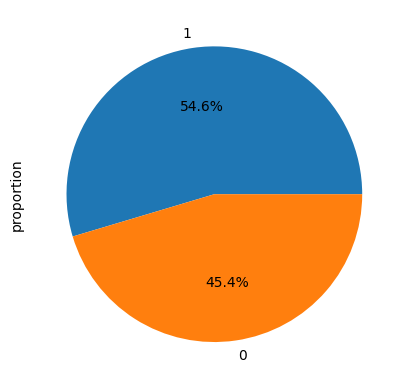

In [ ]:
df['¬øComplicaci√≥n?'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

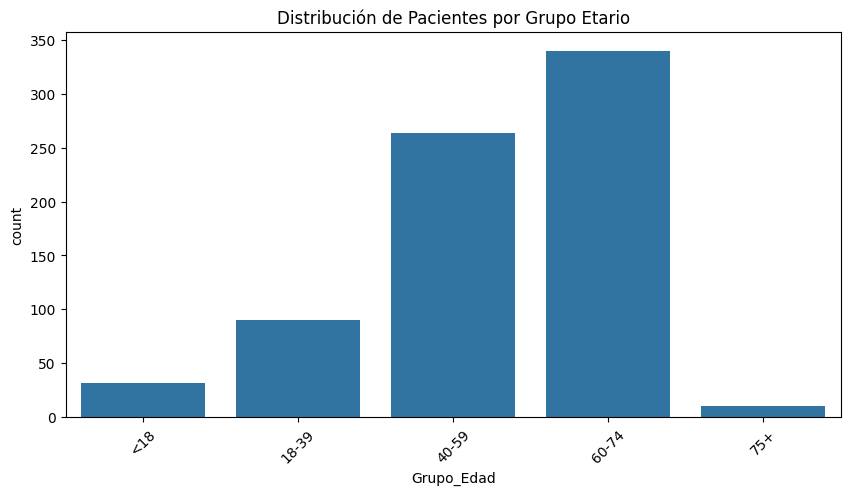

In [92]:
### 

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grupo_Edad' )
plt.xticks(rotation=45)
plt.title("Distribuci√≥n de Pacientes por Grupo Etario")
plt.show()

In [93]:

df["Sobrevida_PeriQx_30_d√≠as_POP"].value_counts()    

Sobrevida_PeriQx_30_d√≠as_POP
1.0    646
0.0     56
Name: count, dtype: int64

In [94]:
df["Sobrevida_PeriQx_30_d√≠as_POP"].value_counts(normalize=True)    

Sobrevida_PeriQx_30_d√≠as_POP
1.0    0.920228
0.0    0.079772
Name: proportion, dtype: float64

Podemos evidenciar que el 92 % de los pacientes presentan sobrevida positiva en el primer mes postoperatorio

In [95]:
df[["Ecocardiograma_POP_PASP","¬øComplicaci√≥n?"]].loc[(df["Ecocardiograma_POP_PASP"]!= 0) & df["Ecocardiograma_POP_PASP"].notna()]

Ecocardiograma_POP_PASP  ¬øComplicaci√≥n?
54                      50.0               1
129                     33.0               1
155                     27.0               0
545                     31.0               0
619                     24.0               1
632                     38.0               0
636                     38.0               0
637                     40.0               0
638                     21.0               0
668                     72.0               1

In [96]:
df["Ecocardiograma_POP_PASP"].loc[df["Ecocardiograma_POP_PASP"]!= 0].describe()

count    10.000000
mean     37.400000
std      14.833895
min      21.000000
25%      28.000000
50%      35.500000
75%      39.500000
max      72.000000
Name: Ecocardiograma_POP_PASP, dtype: float64

Se registran solo 10 pacientes con datos en ecocardiograma, de ello se puede evidenciar que la media es de 37 unidades, lo cual segun su definici√≥n es una presi√≥n normal. Sin embargo el dato tambi√©n muestra pacientes con presiones por encima de los 39.5, lo cual puede entenderse como una muestra de hipertensi√≥n pulmonar

#### Trombosis_Porta_Tumoral
"presencia de un trombo (co√°gulo) dentro de la vena porta asociado a invasi√≥n tumoral
Pre Trasplante"

In [97]:
df["Trombosis_Porta_Tumoral"].value_counts()

Trombosis_Porta_Tumoral
0.0    188
1.0     31
Name: count, dtype: int64

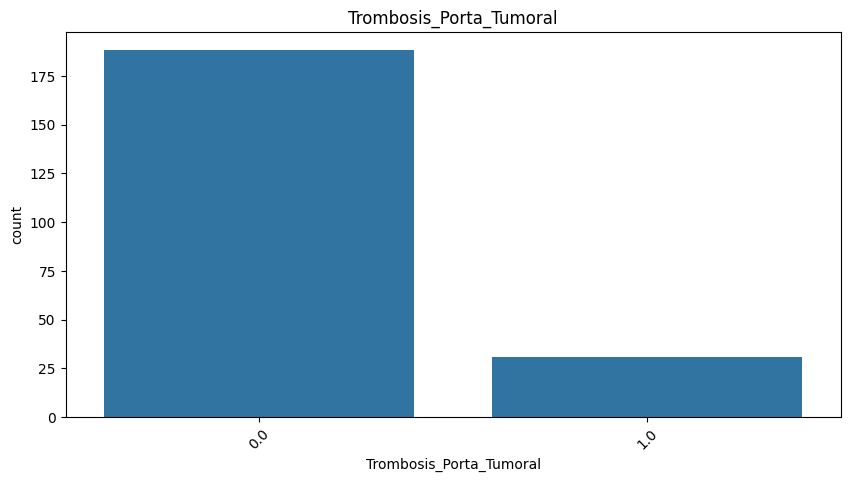

In [119]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Trombosis_Porta_Tumoral')
plt.xticks(rotation=45)
plt.title("Trombosis_Porta_Tumoral")
plt.show()

Dentro del grupo de pacientes que cuentan con la evaluaci√≥n de presencia de trombosis, solo 31 evidenciaron presencia de Trombosis en la vena Portal.

#### Inmunosupresi√≥n_con_Anticuerpos

El tratamiento inmunosupresior puede usarse antes de la cirugia como despues.Puede usarse como tratamiento de respuesta al rechazo o como terapia preventiva al mismo.

In [98]:
df["Tuvo_Inmunosupresi√≥n_con_Anticuerpos"].value_counts()

Tuvo_Inmunosupresi√≥n_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

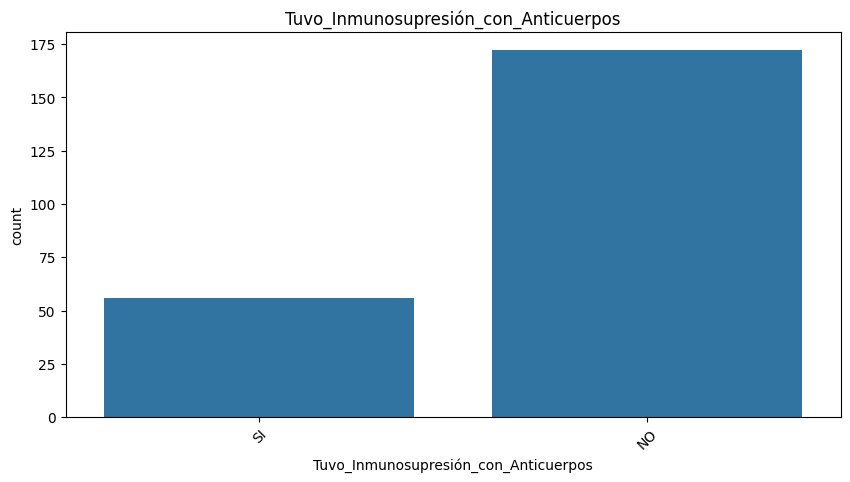

In [99]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Tuvo_Inmunosupresi√≥n_con_Anticuerpos')
plt.xticks(rotation=45)
plt.title("Tuvo_Inmunosupresi√≥n_con_Anticuerpos")
plt.show()

En la base de datos analizada, 56 pacientes recibieron inmunosupresi√≥n con anticuerpos, mientras que 172 no la recibieron

####  AFP_categoria

In [100]:
df["AFP_categoria"].value_counts()

AFP_categoria
Normal (<10)                   165
Elevaci√≥n leve (10‚Äì100)         53
Alta sospecha (>200)            11
Diagn√≥stico probable (>400)     10
Indeterminado (100‚Äì200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

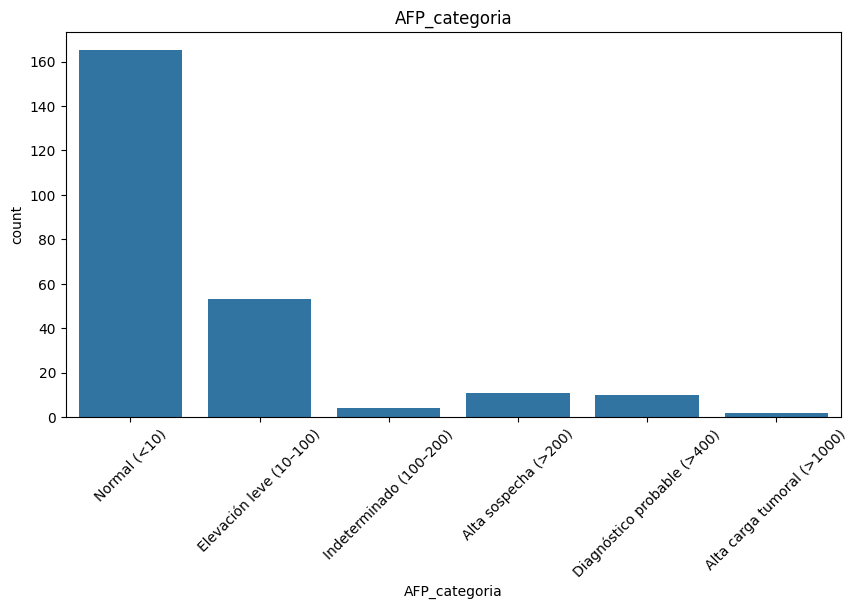

In [101]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='AFP_categoria')
plt.xticks(rotation=45)
plt.title("AFP_categoria")
plt.show()

En su mayoria los pacientestienen presencia de Alfa-Fetoprotenia en rangos considerados normales. Sin embargo se logran identificar pacientes con altas suspechas, diagnosticos probables y tambi√©n con alta carga tumoral

#### Œ±FP_Al_Dx 
Alfa-fetoprote√≠na (AFP) al momendo del diagnostico (marcador tumoral)

In [102]:
df["Œ±FP_Al_Dx"].describe()


count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: Œ±FP_Al_Dx, dtype: float64

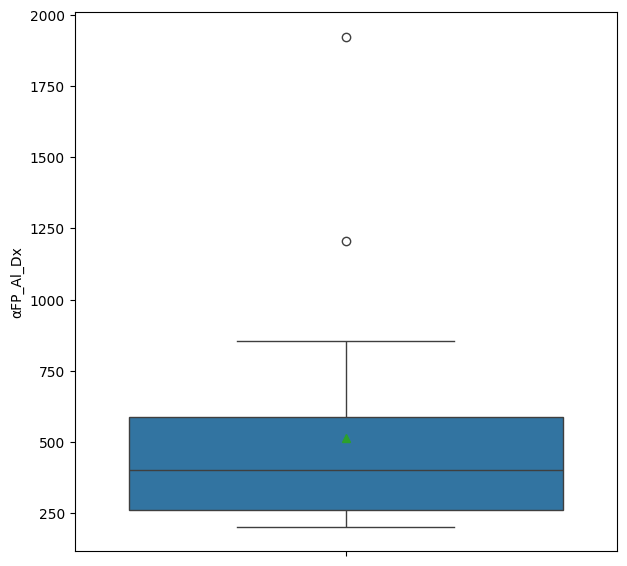

In [103]:
# boxPlot lead_time
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df.loc[(df['Œ±FP_Al_Dx']> 200)],
    y='Œ±FP_Al_Dx',
    showmeans=True
)
plt.show()

El 75% de los pacientes tienen valores inferiores a 15.37 ng/mL, mientras que el valor m√°ximo (1924 ng/mL) representa un caso extremo con diagn√≥stico confirmado de Hepatocarcinoma (HCC).

Al tomar los pacientes dentro de los grupos relevantes, que son aquellos con valores de la proteina superiores a 200, podemos evidenciar que la media esta al rededor de las 500 unidades, lo cual ya es indicativo de presencia de cancer. Tambi√©n se evidencian los pacientes atipicos con un diagnostico de hepatocarcinoma comprobado con valores superiores a 1000 unidades. 

#### Grado_HCC:
Clasifica el hepatocarcinoma seg√∫n el grado de diferenciaci√≥n celular del tumor, siendo un indicador histol√≥gico de agresividad. 

   1: "Bien diferenciado" <br/>
    2: "Moderadamente diferenciado", <br/>
    3: "Poco diferenciado", <br/>
    4: "Indiferenciado" 
   

In [104]:
df["Grado_HCC"].value_counts()



Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

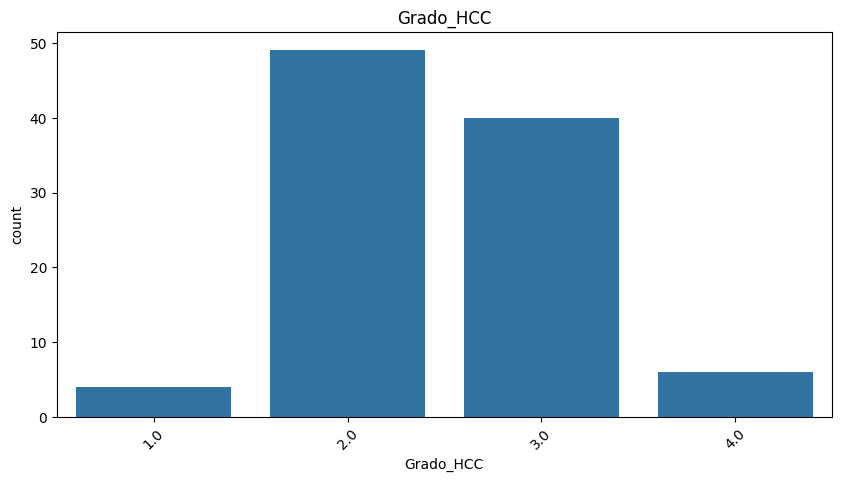

In [105]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grado_HCC')
plt.xticks(rotation=45)
plt.title("Grado_HCC")
plt.show()

De los 99 pacientes con diagn√≥stico confirmado de hepatocarcinoma, la mayor√≠a presenta un grado 2, lo cual indica una diferenciaci√≥n celular moderada, es decir, las c√©lulas cancerosas a√∫n conservan ciertas caracter√≠sticas de las c√©lulas hep√°ticas normales.
Sin embargo, un grupo importante de pacientes (grados 3 y 4) exhibe poca o nula diferenciaci√≥n, lo que se asocia con tumores m√°s agresivos y con peor pron√≥stico cl√≠nico.

#### Estadio

In [106]:
df["Estadio"].value_counts()


Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

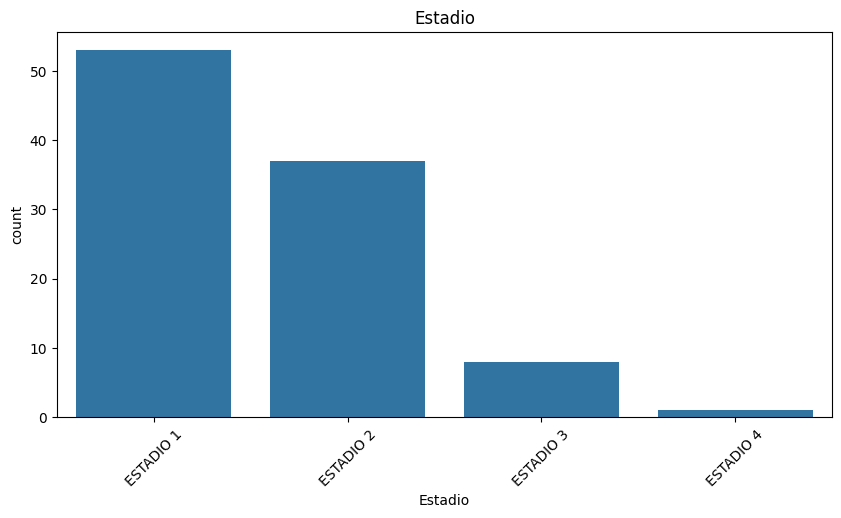

In [107]:
# tipo de reserva seg√∫n lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Estadio', order=['ESTADIO 1','ESTADIO 2','ESTADIO 3','ESTADIO 4'])
plt.xticks(rotation=45)
plt.title("Estadio")
plt.show()

1: Tumor peque√±o y localizado, sin ganglios afectados ni met√°stasis. <br/>
2: Tumor un poco mas grande o con invasion m√≠nima, pero aun localizado. <br/>
3: Tumor grande o con invasi√≥n vascular, sin ganglios ni met√°stasis. <br/>
4: Tumor que invade estructuras adyacentes. <br/>

Los pacientes que el diagnostico del Estadio, en su mayoria presentan un tumor peque√±o y  localizado, lo que puede sugiere una detecci√≥n temprana. Mientras que los pacientes que presentan tumores grandes o invasivos se presentan como un grupo menor en la muestra.

### BIVARIADO Y PRUEBA DE HIPOTESIS

#### Trombosis_Porta_Tumoral vs Complicaci√≥n

In [111]:
ct = pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¬øComplicaci√≥n?'], normalize='index')

pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¬øComplicaci√≥n?'], normalize='index')

¬øComplicaci√≥n?                  0         1
Trombosis_Porta_Tumoral                    
0.0                      0.414894  0.585106
1.0                      0.419355  0.580645

Teniendo en cuenta que solo 31 pacientes presentan esta condici√≥n de tener un coagulo en la vena porta, se puede evidenciar que aparentemente esta condici√≥n no implica necesariamente una complicaci√≥n dado que el 41% de los pacientes que presentaron este diagnostico, no presentaron complicaciones. Ademas de que las complicaciones en ambos grupos (tanto los que tuvieron un diagnostico de trombosis como los que no) la proporci√≥n de complicaciones es la misma, de un 58% 

H‚ÇÄ (nula): No existe asociaci√≥n entre la presencia de trombosis portal tumoral y la ocurrencia de complicaciones postrasplante. <br/>
H‚ÇÅ (alternativa): Existe asociaci√≥n entre ambas variables.

In [120]:
from scipy.stats import chi2_contingency

tabla = pd.crosstab(df['Trombosis_Porta_Tumoral'], df['¬øComplicaci√≥n?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")

Chi2: 0.000, p-valor: 1.000


Dado que el p valor es mayor que 0,05 se puede concluir que no se rechaza la hipotesis nula, mostrando asi que no hay evidencia estadisticamente significativa de la asociaci√≥n entre complicaciones y trombosis en la vena portal. 

<span style="color:red"> Aunque cl√≠nicamente la trombosis portal tumoral podr√≠a asociarse con un mayor riesgo de complicaciones por la afectaci√≥n vascular, los resultados descriptivos no muestran diferencias contundentes entre los grupos.<span/>

#### Tuvo_Inmunosupresi√≥n_con_Anticuerpos vs Complicacion

In [112]:
ct = pd.crosstab(df['Tuvo_Inmunosupresi√≥n_con_Anticuerpos'], df['¬øComplicaci√≥n?'], normalize='index')

pd.crosstab(df['Tuvo_Inmunosupresi√≥n_con_Anticuerpos'], df['¬øComplicaci√≥n?'], normalize='index')

¬øComplicaci√≥n?                               0         1
Tuvo_Inmunosupresi√≥n_con_Anticuerpos                    
NO                                    0.459302  0.540698
SI                                    0.392857  0.607143

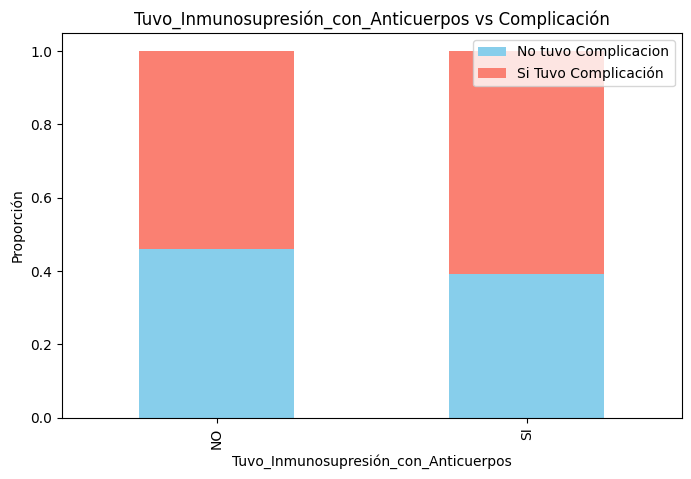

In [113]:
ct.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'salmon'])
plt.ylabel("Proporci√≥n")
plt.xlabel("Tuvo_Inmunosupresi√≥n_con_Anticuerpos")
plt.legend(["No tuvo Complicacion", "Si Tuvo Complicaci√≥n"], loc="upper right")
plt.title("Tuvo_Inmunosupresi√≥n_con_Anticuerpos vs Complicaci√≥n")
plt.show()

El 60.7% de los pacientes que recibieron inmunosupresi√≥n con anticuerpos presentaron alguna complicaci√≥n postrasplante.

En contraste, el 54% de los pacientes sin tratamiento inmunosupresor tambi√©n presentaron complicaciones.

Si bien la proporci√≥n es mayor en los tratados, la diferencia no parece marcadamente amplia, lo cual sugiere que las complicaciones podr√≠an no depender exclusivamente del uso del tratamiento inmunosupresor, sino del estado cl√≠nico previo y del motivo de su administraci√≥n (prevenci√≥n vs. respuesta a rechazo).

H‚ÇÄ (nula): No existe asociaci√≥n entre el uso de inmunosupresores con anticuerpos y las complicaciones postrasplante.

H‚ÇÅ (alternativa): Existe asociaci√≥n entre ambas variables.

In [ ]:

tabla = pd.crosstab(df['Tuvo_Inmunosupresi√≥n_con_Anticuerpos'], df['¬øComplicaci√≥n?'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2: {chi2:.3f}, p-valor: {p:.3f}")


Chi2: 0.511, p-valor: 0.475


Dado que el p valor es mayor a 0,05 no se rechaza la hipotesis nula, lo que concluye que no hay evidencia estadisticamente significativa de la asociacion entre el tratamiento con inmunosupresores (Tuvo_Inmunosupresi√≥n_con_Anticuerpos) y la presencia de complicaciones.

#### Œ±FP_Al_Dx vs Complicacion

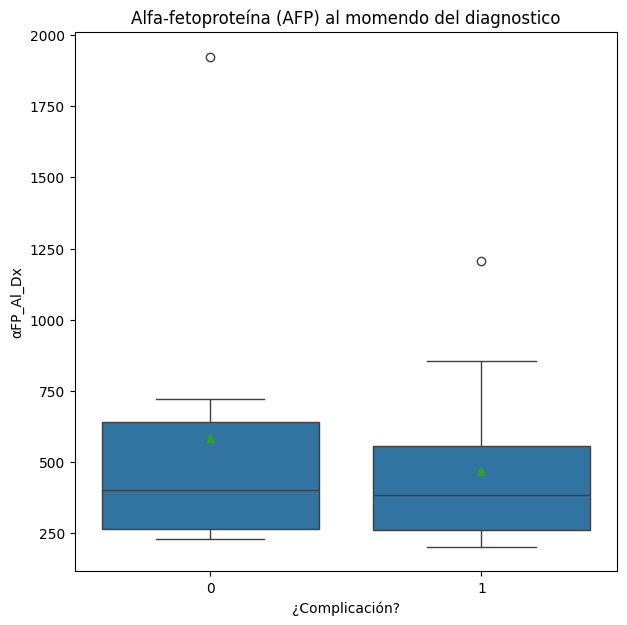

In [126]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    x='¬øComplicaci√≥n?',
    y='Œ±FP_Al_Dx',
    data=df.loc[df['Œ±FP_Al_Dx'] >200],  #
    showmeans=True
)
plt.title("Alfa-fetoprote√≠na (AFP) al momendo del diagnostico")
plt.xlabel("¬øComplicaci√≥n?")
plt.ylabel("Œ±FP_Al_Dx")
plt.show()

Para explorar la relaci√≥n entre los niveles de AFP y la presencia de complicaciones, se analizaron los pacientes con valores superiores a 200 ng/mL, considerados cl√≠nicamente relevantes como indicativos de tumor activo.
El boxplot comparativo muestra que las medias de AFP en los grupos con y sin complicaciones son similares, y que el valor m√°s extremo de AFP se presenta, incluso, en pacientes que no desarrollaron complicaciones postrasplante.

Esto sugiere que, aunque niveles altos de AFP reflejan una mayor carga tumoral o un estadio m√°s avanzado del carcinoma hepatocelular, no se evidencia una asociaci√≥n directa con la aparici√≥n de complicaciones en el contexto postrasplante.

H‚ÇÄ: No existe diferencia significativa en los valores de AFP entre pacientes con y sin complicaciones.

H‚ÇÅ: Existe una diferencia significativa en los valores de AFP entre ambos grupos.

In [128]:
import scipy.stats as stats

# Filtrar los grupos seg√∫n si tuvieron o no complicaciones
grupo_sin_comp = df[df["¬øComplicaci√≥n?"] == 0]["Œ±FP_Al_Dx"].dropna()
grupo_con_comp = df[df["¬øComplicaci√≥n?"] == 1]["Œ±FP_Al_Dx"].dropna()

# Aplicar prueba de Mann-Whitney U (no param√©trica)
stat, p_value = stats.mannwhitneyu(grupo_sin_comp, grupo_con_comp, alternative='two-sided')

print("üìä Resultado prueba Mann-Whitney U")
print(f"Estad√≠stico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")


üìä Resultado prueba Mann-Whitney U
Estad√≠stico U: 7483.00
Valor p: 0.7569


Dado que el p valor es superior a 0,05 podemos concluir que no hay evidencia suficiente para afirmar que los valores de AFP difieran entre los grupos con y sin complicaciones. No hay diferencia significativa entre los valores de AFP para pacientes con complicaciones vs sin complicaciones

#### Grado_HCC vs Complicacion

In [115]:
pd.crosstab(df["Grado_HCC"], df["¬øComplicaci√≥n?"], normalize='index') 

¬øComplicaci√≥n?         0         1
Grado_HCC                         
1.0             0.500000  0.500000
2.0             0.448980  0.551020
3.0             0.225000  0.775000
4.0             0.333333  0.666667

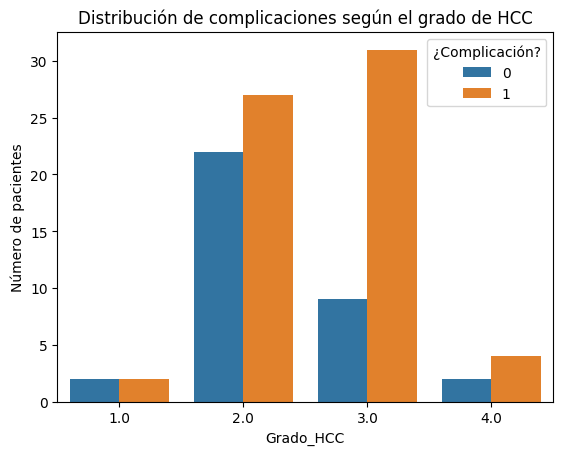

In [116]:
sns.countplot(data=df_trans_hepatico, x="Grado_HCC", hue="¬øComplicaci√≥n?")
plt.title("Distribuci√≥n de complicaciones seg√∫n el grado de HCC")
plt.ylabel("N√∫mero de pacientes")
plt.show()

<span style="color:red"> Se observa una tendencia ascendente: los pacientes con grados m√°s avanzados presentan una mayor proporci√≥n de complicaciones postrasplante.<span/>

En el grado I, el 50 % de los pacientes tuvo complicaciones, mientras que en el grado III la proporci√≥n asciende al 77.5 % y en el grado IV al 66.7 %.

Este comportamiento sugiere que la severidad histol√≥gica del tumor podr√≠a estar asociada con un mayor riesgo de eventos adversos tras el trasplante.


H‚ÇÄ (nula): No existe relaci√≥n entre el grado histol√≥gico del hepatocarcinoma y la presencia de complicaciones postrasplante.

H‚ÇÅ (alternativa): Existe una relaci√≥n entre el grado histol√≥gico del hepatocarcinoma y la presencia de complicaciones postrasplante.

In [130]:
# Prueba de Chi-cuadrado
tabla = pd.crosstab(df["Grado_HCC"], df["¬øComplicaci√≥n?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 5.231
p-valor: 0.1557


A pesar de que se identific√≥ una tendencia ascendente en donde a medida que aumenta el Grado_HCC se incrementa la proporci√≥n  de pacientes con complicacion, la prueba de hipotesis arroja un p value superior a 0,05, por lo cual no se tiene evidencia suficiente para afirmar una relaci√≥n estadisticamente significativa.

#### Estadio

In [117]:
pd.crosstab(df["Estadio"], df["¬øComplicaci√≥n?"], normalize='index') 

¬øComplicaci√≥n?         0         1
Estadio                           
ESTADIO 1       0.433962  0.566038
ESTADIO 2       0.297297  0.702703
ESTADIO 3       0.125000  0.875000
ESTADIO 4       0.000000  1.000000

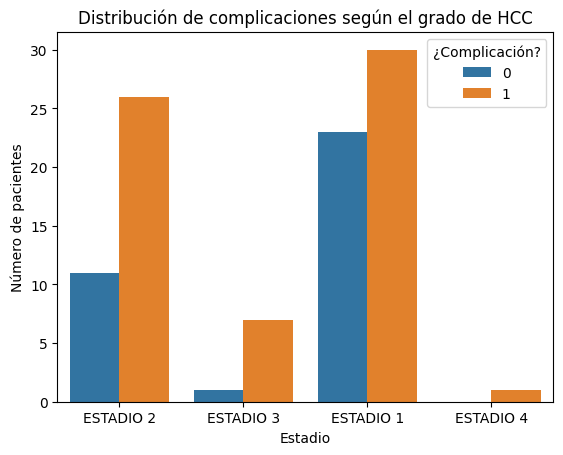

In [118]:
sns.countplot(data=df_trans_hepatico, x="Estadio", hue="¬øComplicaci√≥n?")
plt.title("Distribuci√≥n de complicaciones seg√∫n el grado de HCC")
plt.ylabel("N√∫mero de pacientes")
plt.show()

Se puede evidenciar que a medida que el tumor es mas invasivo, se presentan mas complicaciones en el paciente dado que 

En el estadio 1, poco m√°s de la mitad presenta complicaciones (56.6%). <br/>
En el estadio 2, las complicaciones suben a 70%. <br/>
En el estadio 3, casi el 90% presenta complicaciones. <br/>
En el estadio 4, todos los pacientes tuvieron complicaciones. <br/>



H‚ÇÄ (nula): No existe asociaci√≥n entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante.

H‚ÇÅ (alternativa): Existe una asociaci√≥n entre el estadio del hepatocarcinoma y la presencia de complicaciones postrasplante

In [131]:
# Prueba Chi-cuadrado
tabla = pd.crosstab(df["Estadio"], df["¬øComplicaci√≥n?"])
chi2, p_value, dof, expected = stats.chi2_contingency(tabla)

print(f"\nChi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.4f}")


Chi-cuadrado: 4.387
p-valor: 0.2226


Dado que el p valor es superior a 0,05 no es posible rechazar la hipotesis nula, por lo cual se acepta que no existe asociacion estadisticamente significativa entre el estadio y las complicaciones.

#### Conclusion 

A pesar de que las variables Trombosis_Porta_Tumoral ,Tuvo_Inmunosupresi√≥n_con_Anticuerpos, Œ±FP_Al_Dx, Grado_HCC y Estadio no presentaron relevancia estadisticamente significativa, cabe aclarar que esto no implica que la relaci√≥n no sea real. 

Se resalta que variables como Grado_HCC y Estadio presentan una tendencia significatica al presentar mayor proporci√≥n de complicaciones conforme aumenta su grado. 

Se plantea continuar con un analisis multivariado que permita identificar combinaciones de factores que puedan influir en las complicaciones, con eso se podr√° tratar el efecto aislado que presentamos aqui de cada variable